<a href="https://colab.research.google.com/github/rsnatorres/analise_dados_ramon/blob/main/2024_01_analise_renda_belo_monte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme

Este notebook apresenta os códigos para geração de algusns dos gráficos dos tópicos Atividades Econômicas e Renda do Relatório de Acompanhamento das Condições de Vida da População do Trecho de Vazão Reduzida.

O projeto é coordenado pela Tractebel Engeneering

# Introduçao

Observações

A estrutura de código abaixo pode ser aprimorada nos seguintes aspectos

1) Estruturar um pipeline de dados - Separar limpeza de análise (separar também geração de gráficos?)

2) Substituir as hardcode solutions (principalmente nos gráficos) por soluções robustas


Possíveis problemas nos dados devem ser conferidos através das palavras PROBLEMA e PENDENCIA

In [ ]:
import pandas as pd
from IPython import display
pd.options.display.max_columns=None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pymannkendall as mk
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from plotnine import *
from plotnine.data import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from unidecode import unidecode
import re

## Ambient Vars

In [ ]:
path_graf = r'D:\OneDrive\0 - Torres Consultoria\As Consultorias\202401 - Tractebel - Belo Monte (8)\graficos_ramon'

In [ ]:
# alterar todo novo relatorio de acordo com novos anos inclusos
periodo_padronizado2_categories = ['SECA 2012', 'CHEIA 2013', 'SECA 2013', 'CHEIA 2014', 'SECA 2014',
       'CHEIA 2015', 'SECA 2015', 'CHEIA 2016', 'SECA 2016', 'CHEIA 2017', 'SECA 2017', 'CHEIA 2018',
        'SECA 2018', 'CHEIA 2019', 'SECA 2019', 'CHEIA 2020', 'SECA 2020', 'CHEIA 2021', 'SECA 2021',
       'CHEIA 2022', 'SECA 2022', 'CHEIA 2023', 'SECA 2023']

In [ ]:
# definindo localidade da análise
localidade = 'AREA URBANA-2'

# Df Geral
Contem as informações de referência --> data, local, ano

CHAVE: 'identificador'

In [ ]:
df_geral = pd.read_excel('base.xlsx', sheet_name = 'TABELA GERAL', header=0,
                        parse_dates=False)
df_geral.columns = df_geral.columns.str.lower().str.strip().str.replace(' ', '_')
df_geral['data'] = pd.to_datetime(df_geral['data'], infer_datetime_format=True)
# o identificador é único, mas tem uma linha vazia
df_geral.identificador.nunique(), len(df_geral)

C:\Users\Lord-\AppData\Local\Temp\ipykernel_13528\3186643876.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


(4901, 4901)

In [ ]:
df_geral.head(2)

,identificador,contratante,monitoramento,pre_/_pos,local_da_pesquisa,local_da_pesquisa_x,local_da_pesquisa_y,entrevistador,data,data_do_banco_de_dados,mes_ano,ano,periodo_padronizado,periodo_padronizado2,hora_de_inicio_da_entrevista,identificacao_proprietario,proprietario,conjuge,tipo_de_documento,numero_do_documento,quantas_pessoas_moram_na_casa,telefone_do_proprietario_fixo,telefone_do_proprietario_celular,denominacao_da_propriedade,local_da_residencia,referencia_setorial_residencia,area,"no_que_diz_respeito_à_sua_relação_com_essa_casa,_o(a)_sr.(a)_diria_que_é:_(pa11)",o_(a)_senhor(a)_é_proprietário(a)_de_alguma_embarcação_de_uso_próprio?_(pa12),coordenada_propriedade_x,coordenada_propriedade_y,endereco_da_propriedade,tipo_de_acesso,com_que_frequência_o(a)_senhor(a)_usa_esse_lote_(pa_2.1),descricao_do_acesso_por_terra_travessao,endereco_principal_ou_alternativo,numero_do_lote_no_incra,"para_quê_esse_lote_é_utilizado?_ou_seja,_quais_os_usos_que_se_fazem_desse_lote?_(pa_8.1)",nome_da_gleba_assentamento,nº_termo_de_autorizacao_de_uso_spu,ultima_entrevista,grupo_familiar_indigena_jericoa,id_entrevistado,nome_do_entrevistado,telefone_do_entrevistado_fixo,telefone_do_entrevistado_celular,o_entrevistado_e,caso_outro_entrevistado_especificar_qual,o_entrevistado_mora_na_propriedade,se_nao_indicar_o_endereco_do_entrevistado,area_da_proppriedade_ha,atividade_principal_de_geracao_de_renda,atividade_complementar_de_geracao_de_renda,voce_realiza_alguma_producao_agricola_fora_do_lote,o_entrevistado_tem_producao_agropecuaria_nesta_propriedade_caso_nao_passe_para_a_questao,qual_o_tempo_gasto_ate_a_area_de_producao_agricola,produtos_cultivados_nesta_propriedade_safra_ano,voce_notou_alguma_mudanca_nos_acessos_terrestres_nos_ultimos_seis_meses,como_classificaria_essa_mudanca_nos_acessos_terrestres,desde_quando_percebe_esta_mudanca,ao_que_voce_relaciona_essa_mudanca,a_mudanca_no_acesso_terrestre_aumentou_seu_uso_no_deslocamento_e_escoamento_da_producao,qual_o_tipo_de_deslocamento/forma_de_escoamento_da_producao_voce_prefere,favor_continuar_o_preenchimento_do_item_na_tabela_produtos_cultivados,produtos_beneficiados_no_estabelecimento_safra_ano,produtos_beneficiados_no_estabelecimento_sim_ou_nao,favor_continuar_o_preenchimento_do_item_na_tabela_produtos_beneficiados,o_senhor_cria_animais,houve_criacao_de_animais_fora_do_lote_no_ultimo_ano,qual_o_tempo_gasto_ate_a_area_de_criacao_de_animais_fora_do_lote,os_animais_de_criacao_sao_para_comercializacao,favor_preencher_o_item_na_tabela_producao_e_criacao,qual_e_a_renda_mensal_liquida_obtida_com_a_agropecuaria_r$,pratica_pesca,tipo_pesca_praticada,quantos_membros_desse_domicilio_pescam,quantos_dias_por_semana_pescam,quantos_quilos_de_peixe_os_membros_do_domicilio_pescam_por_semana,melhor_epoca_do_ano_em_que_se_realiza_a_pesca,melhor_mes_do_ano_em_que_se_realiza_a_pesca,principais_destinos_de_pesca,houve_alguma_alteracao_desse_destinos,qual_alteracao,favor_preencher_o_item_na_tabela_atividade_pesqueira,qual_e_a_renda_mensal_obtida_com_a_pesca_r$,o_senhor_cria_peixes_caso_nao_passe_para_a_questao,caso_sim_como_o_senhor_realiza_a_atividade,caso_outro_como_o_senhor_realiza_a_atividade_especificar_qual,a_criacao_de_peixes_e,caso_outro_especificar_criacao_de_peixes,favor_preencher_o_item_na_tabela_criacao_de_peixe,desenvolve_alguma_atividade_ligada_ao_extrativismo_vegetal_caso_nao_passe_para_a_questao,favor_preencher_o_item_na_tabela_extrativismo_vegetal,a_atividade_e,qual_e_a_renda_mensal_liquida_obtida_com_o_extrativismo_vegetal_r$,o_senhor_tem_alguma_autorizacao_para_o_extrativismo_vegetal_com_plano_de_manejo,caso_positivo_indicar_qual,orgao_responsavel_pela_autorizacao,caso_outro_especificar_orgao_responsavel_pela_autorizacao,o_senhor_desenvolve_alguma_atividade_ligada_ao_extrativismo_mineral_caso_nao_passe_para_a_questao,frente_de_garimpo_em_que_atua,possui_alguma_autorizacao,"caso_positivo,_indicar_qual",qual_e_a_renda_mensal_liquida_obtida_com_o_extrativismo_mineral_r$,como_e_feito_o_escoamento_de_prod

## Padronizando Área
Variáveis de localidade:
1) area ('area urbana-1', 'area rural-2'...)
2) local de residencia ('ressaca, ilha da fazenda, garimpo do galo...)
3) local de pesquisa ('ressaca, ilha da fazenda, garimpo do galo...)
4) referencia setorial residencia ('ressaca, ilha da fazenda, garimpo do galo...)
** este tem muitas obs na opção 'NAO SE APLICA'

Os estratos ('area urbana-1', 'area rural-2' ...) são categorizados de acordo com a coluna 'local de residencia' (?). Mas há locais de residencia que estão em mais de um estrato --> PROBLEMA


In [ ]:
df_geral['area'].value_counts()

area
AREA URBANA-2     1454
AREA URBANA-1     1181
AREA RURAL-1      1089
AREA RURAL-2       923
AREA  RURAL 1       65
AREA  URBANA 1      64
AREA  URBANA 2      63
AREA  RURAL 2       62
Name: count, dtype: int64

In [ ]:
df_geral['area'].unique()

array(['AREA URBANA-2', 'AREA RURAL-2', 'AREA URBANA-1', 'AREA RURAL-1',
       'AREA  URBANA 1', 'AREA  URBANA 2', 'AREA  RURAL 2',
       'AREA  RURAL 1'], dtype=object)

In [ ]:
df_geral['area'] = df_geral['area'].str.replace('AREA  URBANA 1', 'AREA URBANA-1')
df_geral['area'] = df_geral['area'].str.replace('AREA  URBANA 2', 'AREA URBANA-2')
df_geral['area'] = df_geral['area'].str.replace('AREA  RURAL 1', 'AREA RURAL-1')
df_geral['area'] = df_geral['area'].str.replace('AREA  RURAL 2', 'AREA RURAL-2')

In [ ]:
df_geral['area'].value_counts()

area
AREA URBANA-2    1517
AREA URBANA-1    1245
AREA RURAL-1     1154
AREA RURAL-2      985
Name: count, dtype: int64

## Area x Localidade (conforme Anexo 14.2.3 - 1)

alterações janeiro de 2023:
paquicamba e rio bacaja foram retirados de area rural 1;
bacajaí foi retirado de area rural 2;

PENDENCIA: Toda essa parte da estratificação e seus ajustes vai ficar para o próximo relatório, pois os gráficos já realizados foram feitos com base na primeira base de dados parcial enviada pela OPNIAO. Posteriormente, é recomendado fazer um ajuste na coluna 'area', pois algumas localidades estão classificadas como estratos aos quais não pertencem.

In [ ]:
# atualizado
#dict_localidades_estratos = {
#'AREA URBANA-1' : ['RESSACA', 'ILHA DA FAZENDA', 'GARIMPO DO GALO'],
#'AREA URBANA-2' : ['BELO MONTE DO PONTAL - ANAPU','BELO MONTE II - VITORIA DO XINGU',
#                  'VILA DO 7,5', 'VILA ISABEL'],
# Talvez seja apropriado construir replaces para as opções destacadas abaixo
#'AREA RURAL-1' : ['ARROZ CRU', 'GLEBA BACAJAI', 'CANA VERDE - MANGUEIRAS', 'GLEBA ITATA',
#  'IGARAPE BACAJAI', 'IGARAPE ITATA', 'IGARAPE ITUNA','KAITUKA', 'PIRARARA',
#  'ITUNA', # 'IGARAPE ITUNA'?
#  'VILA ITATA', # 'GLEBA ITATA'?
#  'BACAJAI'# 'GLEBA BACAJAI'?
#               ],
#'AREA RURAL-2' : ['CARACOL', 'CENTRINHO', 'CNEC', 'GOIANINHO', 'ILHA DA BALEIA', 'JERICOA', 'MARANHENSES',
#                'NAO SE APLICA', 'NOVA CONQUISTA', 'PAQUICAMBA', 'RAMAL DO JULIAO', 'RIO BACAJA',
#                'RIO DAS PEDRAS', 'RIO GLEBA BACAJA', 'SURUBIM - NOVO PROGRESSO', 'TERRA PRETA']}
#conditions = [df_geral['local_da_residencia'].isin(dict_localidades_estratos['AREA URBANA-1']),
#              df_geral['local_da_residencia'].isin(dict_localidades_estratos['AREA URBANA-2']),
#              df_geral['local_da_residencia'].isin(dict_localidades_estratos['AREA RURAL-1']),
#              df_geral['local_da_residencia'].isin(dict_localidades_estratos['AREA RURAL-2'])]
#
#values = ['AREA URBANA-1', 'AREA URBANA-2', 'AREA RURAL-1','AREA RURAL-2']
#
#df_geral['area2'] = np.select(conditions, values)
# conferindo diferenças entre area e area2
#df_geral[df_geral['area']!=df_geral['area2']][['area', 'area2', 'local_da_residencia']]
#df_geral.query('area2 == "0"')['local_da_residencia'].unique()
# Corrigindo as exceções --> tem que voltar o código de novo
#for antes, depois in [('BELO MONTE II – VITORIA DO XINGU', 'BELO MONTE II - VITORIA DO XINGU'),
#                      ('BELO MONTE DO PONTAL – ANAPU', 'BELO MONTE DO PONTAL - ANAPU'),
#                      ('PIRARARA - PONTAO', 'PIRARARA'),
#                      ('SURUBIM -NOVO PROGRESSO', 'SURUBIM - NOVO PROGRESSO') ,
#                      ('VILA 7,5', 'VILA DO 7,5')]:
#    df_geral['local_da_residencia'] = df_geral['local_da_residencia'].replace(antes, depois)
#df_geral['area'] = df_geral['area2']

In [ ]:
df_geral['area'].value_counts()

area
AREA URBANA-2    1517
AREA URBANA-1    1245
AREA RURAL-1     1154
AREA RURAL-2      985
Name: count, dtype: int64

## Colunas

Simplificando nomenclatura

In [ ]:
# simplificando labels
df_geral.rename(
    columns={'qual_e_a_renda_mensal_liquida_obtida_com_a_agropecuaria_r$': 'renda_mensal_liq_agrop',
            'qual_e_a_renda_mensal_obtida_com_a_pesca_r$': 'renda_mensal_liq_pesca',
            'qual_e_a_renda_mensal_liquida_obtida_com_o_extrativismo_vegetal_r$': 'renda_mensal_liq_extrat_veg',
            'qual_e_a_renda_mensal_liquida_obtida_com_o_extrativismo_mineral_r$': 'renda_mensal_liq_extrat_min',
            'o_entrevistado_tem_producao_agropecuaria_nesta_propriedade_caso_nao_passe_para_a_questao':'possui_producao_agropecuaria'
                        }, inplace=True)

In [ ]:
df_geral[['renda_mensal_liq_agrop', 'renda_mensal_liq_pesca',
               'renda_mensal_liq_extrat_veg', 'renda_mensal_liq_extrat_min']].values

array([[3500, 240, 'NAO SE APLICA', 0],
       ['NAO SE APLICA', 'NAO PRATICA A PESCA', 'NAO SE APLICA', 3000],
       ['NAO SE APLICA', 0, 'NAO SE APLICA', 0],
       ...,
       [170, 'NAO SE APLICA', 140, 'INEXISTENTE NO QUESTIONARIO'],
       [10000, 'NAO SE APLICA', 'NAO SE APLICA',
        'INEXISTENTE NO QUESTIONARIO'],
       ['NAO SE APLICA', 'NAO SE APLICA', 'NAO SE APLICA',
        'INEXISTENTE NO QUESTIONARIO']], dtype=object)

In [ ]:
# transformando em numeric
for column in ['renda_mensal_liq_agrop', 'renda_mensal_liq_pesca',
               'renda_mensal_liq_extrat_veg', 'renda_mensal_liq_extrat_min']:
    df_geral[column] = pd.to_numeric(df_geral[column], errors='coerce')
    df_geral.loc[df_geral[column]==0, column] = None

In [ ]:
df_geral[['renda_mensal_liq_agrop', 'renda_mensal_liq_pesca',
               'renda_mensal_liq_extrat_veg', 'renda_mensal_liq_extrat_min']].values

array([[ 3500.,   240.,    nan,    nan],
       [   nan,    nan,    nan,  3000.],
       [   nan,    nan,    nan,    nan],
       ...,
       [  170.,    nan,   140.,    nan],
       [10000.,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan]])

## Datas

In [ ]:
# CHAVE para deflacionar
df_geral['mes/ano'] = df_geral['data'].dt.strftime('%m/%Y')
df_geral['mes'] = df_geral['data'].dt.strftime('%m')
df_geral['ano'] = df_geral['data'].dt.strftime('%Y')
df_geral['ano_mes'] = (df_geral['ano'] + df_geral['mes']).astype(float) # vai ser usado no cálculo da taxa de pobreza

In [ ]:
df_geral['periodo_padronizado2'].unique()

array(['SECA 2012', 'CHEIA 2013', 'SECA 2013', 'CHEIA 2014', 'SECA 2014',
       'CHEIA 2015', 'SECA 2015', 'CHEIA 2016', 'VAZANTE 2016',
       'SECA 2016', 'CHEIA 2017', 'SECA 2017', 'CHEIA 2018', 'SECA 2018',
       'CHEIA 2019', 'SECA 2019', 'SECA 2020', 'CHEIA 2021', 'SECA 2021',
       'CHEIA 2022', 'SECA 2022', 'CHEIA 2023', 'SECA 2023'], dtype=object)

In [ ]:
def buscar_palavra(row):
    return re.search(r'\w+', row).group(0)

In [ ]:
# alteração necessária para o relatório de janeiro de 2024, pois  para 2023 veio apenas 'CHEIA'
# em todos os dados do ano, sendo que há "SECA 2023" na var periodo_padronizado2
df_geral['periodo_padronizado'] = df_geral['periodo_padronizado2'].apply(buscar_palavra)

In [ ]:
df_geral.pivot_table(index=['ano', 'periodo_padronizado'],
                     values = 'periodo_padronizado2',
                     aggfunc = 'count')

periodo_padronizado2
ano  periodo_padronizado                      
2012 SECA                                  142
2013 CHEIA                                 201
     SECA                                  201
2014 CHEIA                                 202
     SECA                                  200
2015 CHEIA                                 194
     SECA                                  201
2016 CHEIA                                 204
     SECA                                  200
     VAZANTE                               201
2017 CHEIA                                 200
     SECA                                  203
2018 CHEIA                                 201
     SECA                                  207
2019 CHEIA                                 196
     SECA                                  200
2020 SECA                                  202
2021 CHEIA                                 201
     SECA                                  314
2022 CHEIA                                 255
     SECA                                  261
2023 CHEIA                                 261
     SECA                                  254

In [ ]:
# SECA XXXX, CHEIA XXXX
#df_geral['periodo_padronizado2'] = df_geral['periodo_padronizado'] + ' ' + df_geral['ano']

## Drops

Houve uma pesquisa com periodo denominado 'VAZANTE' em 2016, mas ela não é plotada em nenhum gráfico. Contudo, os resultados dela são contabilizados na comparação pré-pós para a atividade principal de geração de renda. Assim, apenas a partir de agora essa variável será excluída

In [ ]:
df_geral.drop(df_geral[df_geral['periodo_padronizado'] == 'VAZANTE'].index, inplace=True)

## Ocupações

In [ ]:
df_geral['atividade_principal_de_geracao_de_renda'].nunique()

272

Ocupações Principais

In [ ]:
def normalize(string):
    return unidecode(string)

In [ ]:
def transformacoes_ocupacao_principal(df):
    for a, b in [("AGRICULTOR (PRODUTOR RURAL)", "Produtor Rural"),
               ("AGROPECUARIA", "Produtor Rural"),
               ("AGROPECUARIA / EXTRATIVISTA", "Produtor Rural"),
               ("AGROPECUARIA / PESCADOR", "Produtor Rural"),
               ("HORTICULTOR", "Produtor Rural"),
               ("APOSENTADO (A)", "Aposentado(a)/ Pensionista"),
               ("PENSIONISTA", "Aposentado(a)/ Pensionista"),
               ("RECEBE BENEFICIO", "Aposentado(a)/ Pensionista"),
               ("AUTONOMO", "Autônomo"),
               ("AUTONOMO / TRABALHADOR POR CONTA PROPRIA", "Autônomo"),
               ("EMPRESARIO", "Autônomo"),
               ("REVENDEDOR DE PERFUME", "Autônomo"),
               ("BALCONISTA", "Comércio"),
               ("COMERCIANTE", "Comércio"),
               ("VENDEDOR (A)", "Comércio"),
               ("FUNCIONARIO PUBLICO", "Funcionalismo Público"),
               ("FUNCIONÁRIO PUBLICO", "Funcionalismo Público"),
               ("FUNCIONARIO PUBLICO / AGROPECUARIA", "Funcionalismo Público"),
               ("GARIMPEIRO", "Garimpo"),
               ("NAO TRABALHA", "Não Trabalha"),
               ("NAO INFORMADO", "NR"),
               ("ABASTECEDOR DE MAQUINAS", "Outro"),
               ("ACOUGUEIRO", "Outro"),
               ("AGENTE AMBIENTAL", "Outro"),
               ("AGENTE DE SAUDE", "Outro"),
               ("AJUDANTE", "Outro"),
               ("AJUDANTE DE MONTAGEM", "Outro"),
               ("AJUDANTE DE PRODUCAO", "Outro"),
               ("AJUDANTE GERAL", "Outro"),
               ("ALUGUEL DE IMOVEIS", "Outro"),
               ("ARMADOR", "Outro"),
               ("ARRUMADOR", "Outro"),
               ("ARTESAO", "Outro"),
               ("ASSISTENCIA SOCIAL NA AREA DE PESCA", "Outro"),
               ("ATENDENTE", "Outro"),
               ("AUXIALIAR DE CAMPO", "Outro"),
               ("AUXILIAR ADMINISTRATIVO", "Outro"),
               ("AUXILIAR DE AUMOXARIFADO", "Outro"),
               ("AUXILIAR DE CAMPO", "Outro"),
               ("AUXILIAR DE CAMPO BELO SUN", "Outro"),
               ("AUXILIAR DE COZINHA", "Outro"),
               ("AUXILIAR DE OPERACAO", "Outro"),
               ("AUXILIAR DE TOPOGRAFIA", "Outro"),
               ("AUXILIAR OPERACIONAL", "Outro"),
               ("BABA", "Outro"),
               ("BALSEIRO", "Outro"),
               ("BARBEIRO", "Outro"),
               ("CABELEREIRO", "Outro"),
               ("CASEIRO", "Outro"),
               ("CAVADOR DE POCO", "Outro"),
               ("CHEFE DE COZINHA", "Outro"),
               ("CHURRASQUEIRO", "Outro"),
               ("COBRADOR", "Outro"),
               ("CONCERTA MOVEIS", "Outro"),
               ("CONCRETEIRO", "Outro"),
               ("CONFETEIRA", "Outro"),
               ("CONSTRUCAO CIVIL", "Outro"),
               ("CONSTRUCAO NAVAL", "Outro"),
               ("COZINHEIRA", "Outro"),
               ("DJ", "Outro"),
               ("DONA DE CASA", "Outro"),
               ("EMPREGADO COM CARTEIRA ASSINADA", "Outro"),
               ("EMPREGADO SEM CARTEIRA ASSINADA", "Outro"),
               ("EMPREGADO(A) EMPRESA PRIVADA", "Outro"),
               ("EMPREITERO", "Outro"),
               ("ENCANADOR INDUSTRIAL", "Outro"),
               ("ESTIVADOR", "Outro"),
               ("ESTUDANTE", "Outro"),
               ("EXTRATIVISTA", "Outro"),
               ("FABRICA REDES DE PESCA", "Outro"),
               ("FISCAL", "Outro"),
               ("FRENTISTA", "Outro"),
               ("FROSTAMENTO", "Outro"),
               ("GARCOM", "Outro"),
               ("GARI", "Outro"),
               ("GERENTE DE PRODUCAO", "Outro"),
               ("GUARDA PATRIMONIAL", "Outro"),
               ("IGREJA", "Outro"),
               ("IMOBILIARIO", "Outro"),
               ("LUBRIFICADOR", "Outro"),
               ("MADEIREIRO", "Outro"),
               ("MARINHEIRO", "Outro"),
               ("MARINHEIRO DE CONVES", "Outro"),
               ("MARTELEIRO", "Outro"),
               ("MATADOR DE GADO", "Outro"),
               ("MECANICO MONTADOR", "Outro"),
               ("MERGULHADOR", "Outro"),
               ("MINERADOR BELO SUN", "Outro"),
               ("MONTADOR", "Outro"),
               ("MONTADOR DE ANDAIME", "Outro"),
               ("MONTADOR DE MERCADORIAS", "Outro"),
               ("MONTADOR DE TORRE", "Outro"),
               ("OPERADOR DE MAQUINAS", "Outro"),
               ("OPERADOR DE MOTO SERRA", "Outro"),
               ("OPERADOR DE TANQUE - PETROBRAS", "Outro"),
               ("OPERADOR DE VIBRADOR", "Outro"),
               ("OPERADOR VEICULOS PESADOS", "Outro"),
               ("OUTRA ATIVIDADE REMUNERADA", "Outro"),
               ("PADEIRO", "Outro"),
               ("PASTOR", "Outro"),
               ("PEDAGOGA", "Outro"),
               ("PESQUISADOR (A)", "Outro"),
               ("POLICIAL", "Outro"),
               ("PORTEIRO", "Outro"),
               ("PROFESSOR", "Outro"),
               ("RAMPEIRO", "Outro"),
               ("REFLORESTAMENTO", "Outro"),
               ("SOLDADOR", "Outro"),
               ("TECNICO DE GEOLOGIA", "Outro"),
               ("TECNICO EM MINERACAO", "Outro"),
               ("TRABALHADOR CONSTRUCAO CIVIL", "Outro"),
               ("TRABALHADOR DA AREA DE SAUDE", "Outro"),
               ("TRABALHADOR DA AREA DE TRANSPORTE", "Outro"),
               ("TRABALHADOR DA INDUSTRIA", "Outro"),
               ("TRABALHADOR RURAL", "Outro"),
               ("TRATORISTA", "Outro"),
               ("VAQUEIRO", "Outro"),
               ("VIGIA", "Outro"),
               ("VIGILANTE", "Outro"),
               ("ZELADOR - ISOLUX", "Outro"),
               ("COMERCIANTE / PESCADOR", "Pesca"),
               ("PESCADOR", "Pesca"),
               ("PILOTO DE EMBARCACAO", "Piloto de embarcação"),
               ("AJUDANTE DE PEDREIRO", "Serviços"),
               ("BORRACHEIRO", "Serviços"),
               ("CARPINTEIRO", "Serviços"),
               ("CARPINTEIRO / ELETRICISTA", "Serviços"),
               ("ELETRICISTA", "Serviços"),
               ("ENCANADOR", "Serviços"),
               ("GUIA DE PESCA", "Serviços"),
               ("MARCENEIRO", "Serviços"),
               ("MECANICO", "Serviços"),
               ("MOTORISTA", "Serviços"),
               ("PEDREIRO", "Serviços"),
               ("PEDREIRO / MARCENEIRO", "Serviços"),
               ("ROCADOR / SERVICOS RURAIS", "Serviços"),
               ("SERRALHEIRO", "Serviços"),
               ("TRABALHADOR DO SETOR DE SERVICOS", "Serviços"),
               ("AUXILIAR DE SERVICOS GERAIS", "Serviços Gerais/ Diarista"),
               ("DIARISTA", "Serviços Gerais/ Diarista"),
               ("EMPREGADO(A) DOMESTICO(A)", "Serviços Gerais/ Diarista"),
               ("FAXINEIRA", "Serviços Gerais/ Diarista"),
               ("FAXINEIRA / DIARISTA", "Serviços Gerais/ Diarista"),
               ("SERVICOS GERAIS", "Serviços Gerais/ Diarista"),
               ("AGENTE COMUNITARIO DE SAUDE", "Agente de saúde"),
               ("AGENTE OPERACIONAL", "Agente operacional"),
               ("AJUDANTE PRATICO", "Serviços"),
               ("APOSENTADO (A) / AGRICULTOR (PRODUTOR RURAL)", "Produtor Rural"),
               ("ASSESSOR DISTRITAL", "Funcionalismo Público"),
               ("ASSISTENTE ADMINISTRATIVO", "Outro"),
               ("AUXILIAR DE ALMOXARIFE", "Auxiliar de almoxarifado"),
               ("AUXILIAR DE ESCRITORIO", "Outro"),
               ("CACADOR", "Caçador"),
               ("CATADOR DE LATINHAS", "Outro"),
               ("COLETOR DE AMOSTRAS EM BELO SUN", "Pesquisador"),
               ("COLETOR DE INFORMACOES", "Pesquisador"),
               ("COSTUREIRA", "Outro"),
               ("DIARISTA (ROCA)", "Trabalhador rural"),
               ("DIARISTA EM ROCAS/ ROCADOR", "Trabalhador rural"),
               ("DIARISTA/FAXINEIRA", "Serviços Gerais/ Diarista"),
               ("EMPREGADO DOMESTICO", "Serviços Gerais/ Diarista"),
               ("EXTRATIVISTA FLORESTAL (EXCETO MADEIRA)", "Outro"),
               ("LAVRADOR", "Trabalhador rural"),
               ("MANICURE", "Outro"),
               ("MEIO OFICIAL DE CARPINTEIRO", "Carpinteiro"),
               ("MICROSCOPISTA", "Outro"),
               ("MONTADOR DE ELETROMECANICA", "Outro"),
               ("NAO SE APLICA", "NR"),
               ("OPERADOR DE DRAGA", "Garimpo"),
               ("PROFESSOR;", "Professor"),
               ("PROPRIETARIO", "Locador De Imóveis"),
               ("RADIOTECNICO", "Outro"),
               ("ROCADOR", "Trabalhador rural"),
               ("SERINGUEIRO", "Outro"),
               ("SERVENTE ESCOLAR", "Funcionalismo Público"),
               ("SUPERVISOR HIDRAULICO", "Construção civil"),
               ("TECNICO EM ENFERMAGEM", "Outro"),
               ("TRABALHADOR DA CONSTRUCAO CIVIL", "Construção civil"),
               ("AJUDANTE DE OPERACAO PORTUARIA", "Outro"),
               ("ARMADOR DE FERRAGEM", "Outro"),
               ("AUTONOMO(A)", "Autônomo"),
               ("BARQUEIRO/ PILOTO", "Autônomo"),
               ("CABELEIREIRA/ MANICURE", "Serviços"),
               ("COLETORA DE CAMPO", "Pesquisador"),
               ("COMERCIARIO", "Comércio"),
               ("COZINHEIRO", "Outro"),
               ("DIARISTA / FAXINEIRA", "Outro"),
               ("DIARISTA EM ROCAS / ROCADOR", "Trabalhador rural"),
               ("FUNCIONARIO PUBLICO(A)", "Funcionalismo Público"),
               ("GUIA TURISTICO", "Serviços"),
               ("MARINHEIRO FLUVIAL DE CONVES", "Outro"),
               ("NAO RESPONDEU", "NR"),
               ("OLEIRO", "NR"),
               ("OPERADOR DA EXTRACOES E TRATAMENTO DE AGUA", "Outro"),
               ("OPERADOR DE MAQUINA", "Outro"),
               ("PESCADOR DE PEIXES ORNAMENTAIS", "Pesca"),
               ("PRODUTOR RURAL", "Produtor Rural"),
               ("SERVICOS DOMESTICOS / CASEIRO", "Outro"),
               ("TECNICO DE INFORMATICA", "Outro"),
                # ABAIXO (RAMON) PASSAR PARA ANA p atualizar scritp --> PENDENCIA
               ('OUTRA OCUPAÇÃO. QUAL?', 'Outro'),
               ('AUTÔNOMO/TRABALHA POR CONTA PRÓPRIA', 'Autônomo'),
               ('TRABALHADOR RURAL/AGROPECUÁRIA', 'Trabalhador rural'),
               ('TRABALHADOR DA CONSTRUÇÃO CIVIL', 'Construção civil'),
               ('AUXILIAR DE SERVIÇOS GERAIS', 'Serviços Gerais/ Diarista'),
               ('FUNCIONÁRIO PÚBLICO', 'Funcionalismo Público'),
               ('VIGILANTE/VIGIA/SEGURANÇA', 'Outro'),
               ('SERVIÇOS DOMÉSTICOS/CASEIRO', 'Outro'),
               ('PROFESSOR DE ENSINO PRIVADO', 'Outro'),
               ('Agente operacional', 'Outro'),
               ('Pesquisador', 'Outro'),
               ('Locador De Imóveis', 'Outro'),
               ('Auxiliar de almoxarifado', 'Serviços Gerais/ Diarista'),
               ('Carpinteiro', 'Outro'),
               ('Agente de saúde', 'Outro')
               ]:
        df.loc[df['atividade_principal_de_geracao_de_renda'] == normalize(a.lower()),
                    'atividade_principal_de_geracao_de_renda'] = normalize(b.lower())

In [ ]:
def transformacao_ativ_complementar(df):
    for a, b in [("AGRICULTOR (PRODUTOR RURAL)","Agricultura/ Agropecuária"),
           ("AGROPECUARIA","Agricultura / Agropecuária"),
           ("AGROPECUARIA / GARIMPEIRO","Agricultura / Agropecuária"),
           ("AGROPECUARIA / GARIMPEIRO","Agricultura / Agropecuária"),
           ("APOSENTADO (A) / AGRICULTORA","Agricultura / Agropecuária"),
           ("APOSENTADO (A) / AGRICULTORA","Agricultura / Agropecuária"),
           ("COMPRADOR DE PEIXE / AGROPECUARIA","Agricultura / Agropecuária"),
           ("COMPRADOR DE PEIXE / AGROPECUARIA","Agricultura / Agropecuária"),
           ("DIARISTA / AGROPECUARIA","Agricultura / Agropecuária"),
           ("DIARISTA / AGROPECUARIA","Agricultura / Agropecuária"),
           ("FUNCIONARIO PUBLICO / AGROPECUARIA","Agricultura / Agropecuária"),
           ("FUNCIONARIO PUBLICO / AGROPECUARIA","Agricultura / Agropecuária"),
           ("MARCENEIRO / AGROPECUARIA","Agricultura/ Agropecuária"),
           ("MARCENEIRO / AGROPECUARIA","Agricultura/ Agropecuária"),
           ("APOSENTADO (A)","Aposentado(a) / Pensionista"),
           ("PENSIONISTA","Aposentado(a) / Pensionista"),
           ("RECEBE BENEFICIO DE < DE 1 SALARIO","Aposentado(a) / Pensionista"),
           ("AUTONOMO / TRABALHADOR POR CONTA PROPRIA","Autônomo"),
           ("AUTONOMO / TRABALHADOR POR CONTA PROPRIA","Autônomo"),
           ("COMERCIANTE","Comércio"),
           ("COMERCIANTE / FUNCIONARIO PUBLICO","Comércio"),
           ("COMERCIANTE / FUNCIONARIO PUBLICO","Comércio"),
           ("FUNCIONARIO PUBLICO","Funcionalismo Público"),
           ("DIARISTA / GARIMPEIRO","Garimpo"),
           ("DIARISTA / GARIMPEIRO","Garimpo"),
           ("GARIMPEIRO","Garimpo"),
           ("NAO TEM ATIVIDADE COMPLEMENTAR","NA"),
           ("NAO INFORMADO","NR"),
           ("AREEIRO","Outro"),
           ("AUXILIAR ADMINISTRATIVO","Outro"),
           ("AUXILIAR DE ALMOXARIFADO","Outro"),
           ("AUXILIAR DO CAMPO","Outro"),
           ("BALCONISTA","Outro"),
           ("BALSEIRO","Outro"),
           ("CACA","Outro"),
           ("CARPINTEIRO","Outro"),
           ("CARPINTEIRO / AJUDANTE DE PEDREIRO","Outro"),
           ("CARPINTEIRO / AJUDANTE DE PEDREIRO","Outro"),
           ("CARPINTEIRO NAVAL","Outro"),
           ("CASA DE ALUGUEL","Outro"),
           ("CASEIRO","Outro"),
           ("CHEFE DE TURNO","Outro"),
           ("COBRADOR NA BALSA","Outro"),
           ("COLETORA DE DADOS","Outro"),
           ("COMPRADOR DE OURO","Outro"),
           ("CONSTRUCAO CIVIL","Outro"),
           ("CONSTRUCAO NAVAL","Outro"),
           ("COSTUREIRA","Outro"),
           ("COZINHEIRO (A)","Outro"),
           ("DONA DE CASA","Outro"),
           ("ELETRICISTA","Outro"),
           ("ELETRICISTA / PEDREIRO / PINTOR","Outro"),
           ("ELETRICISTA / PEDREIRO / PINTOR","Outro"),
           ("ELETRICISTA / PEDREIRO / PINTOR","Outro"),
           ("EMPREITADOR","Outro"),
           ("EMPREITEIRO","Outro"),
           ("EXTRATIVISTA","Outro"),
           ("FRENTISTA","Outro"),
           ("GARI","Outro"),
           ("IMOBILIARIO","Outro"),
           ("INTERPRETE","Outro"),
           ("MADEIREIRO","Outro"),
           ("MECANICO","Outro"),
           ("MERGULHADOR","Outro"),
           ("MONTADOR","Outro"),
           ("MONTADOR DE TORRE","Outro"),
           ("MOTORISTA","Outro"),
           ("OPERADOR DE MAQUINAS PESADAS","Outro"),
           ("OUTRA ATIVIDADE REMUNERADA","Outro"),
           ("PADEIRO","Outro"),
           ("PEDREIRO","Outro"),
           ("RESTAURANTE / POUSADA","Outro"),
           ("RESTAURANTE / POUSADA","Outro"),
           ("SEGURANCA","Outro"),
           ("TECNICO EM ENFERMAGEM","Outro"),
           ("TRABALHADOR DA CONSTRUCAO CIVIL","Outro"),
           ("TRABALHADOR DA INDUSTRIA","Outro"),
           ("TRABALHADOR RURAL","Outro"),
           ("TRANSPORTE ALTERNATIVO","Outro"),
           ("TRANSPORTE DE CARGA","Outro"),
           ("VAQUEIRO","Outro"),
           ("VENDEDORA","Outro"),
           ("VIGILANTE","Outro"),
           ("AGROPECUARIA / PESCADOR","Pesca"),
           ("AGROPECUARIA / PESCADOR","Pesca"),
           ("EXTRATIVISTA / PESCADOR","Pesca"),
           ("EXTRATIVISTA / PESCADOR","Pesca"),
           ("PESCADOR","Pesca"),
           ("PESCADOR / APOSENTADO APOSENTADO (A)","Pesca"),
           ("PESCADOR / APOSENTADO APOSENTADO (A)","Pesca"),
           ("PESCADOR / DIARISTA","Pesca"),
           ("PESCADOR / DIARISTA","Pesca"),
           ("PESCADOR / VIGILANTE","Pesca"),
           ("PESCADOR / VIGILANTE","Pesca"),
           ("BARQUEIRO","Piloto de embarcação"),
           ("PILOTO DE EMBARCACAO","Piloto de embarcação"),
           ("GUIA DE PESCA","Serviços"),
           ("TRABALHADOR DO SETOR DE SERVICOS","Serviços"),
           ("AUXILIAR DE SERVICOS GERAIS","Serviços Gerais / Diarista"),
           ("DIARISTA","Serviços Gerais / Diarista"),
           ("SERVICOS GERAIS","Serviços Gerais / Diarista"),
           ("AGENTE DE SAUDE","Funcionalismo público"),
           ("AJUDANTE DE PEDREIRO","Construção civil"),
           ("ARMADOR","Construção civil"),
           ("AUTONOMO","Autônomo"),
           ("AUXILIAR DE PADEIRO","Outro"),
           ("BARBEIRO","Serviços"),
           ("BOMBEIRO HIDRAULICO","Construção civil"),
           ("CACADOR","Outro"),
           ("COZINHEIRA","Outro"),
           ("DIARISTA (ROCA)","Trabalhador rural"),
           ("DIARISTA EM ROCA / ROCADOR","Trabalhador rural"),
           ("DIARISTA EM ROCA / ROCADOR","Trabalhador rural"),
           ("DIARISTA/FAXINEIRA","Serviços Gerais / Diarista"),
           ("DIARISTA/FAXINEIRA","Serviços Gerais / Diarista"),
           ("EMPREGADO DOMESTICO","Serviços Gerais / Diarista"),
           ("ESTICADOR DE CERCA","Trabalhador rural"),
           ("EXTRATIVISTA FLORESTAL (EXCETO MADEIRA)","Outro"),
           ("FABRICA REDE DE PESCA","Outro"),
           ("MARCENEIRO","Outro"),
           ("MEEIRO PARCEIRO","Outro"),
           ("NAO SE APLICA","NA"),
           ("NAO TEM OUTRO TRABALHO ","NA"),
           ("OPERADOR DE CAIXA","Outro"),
           ("OPERADOR DE REATOR","Outro"),
           ("PASTOR","Outro"),
           ("PILOTO (BARQUEIRO)","Piloto de embarcação"),
           ("PROPRIETARIO","Outro"),
           ("RADIOTECNICO","Outro"),
           ("ROCADOR","Trabalhador rural"),
           ("VENDE BOMBONS","Outro"),
           ("VENDEDOR","Outro"),
           ("ARTESAO","Outro"),
           ("AUTONOMO(A)","Outro"),
           ("BARQUEIRO / PILOTO","Piloto de embarcação"),
           ("DIARISTA / FAXINEIRA","Autônomo"),
           ("DIARISTA EM ROCA / ROCADOR","Serviços"),
           ("FUNCIONARIO PUBLICO(A)","Funcionario publico"),
           ("NAO POSSUI OCUPACAO SECUNDARIA","NA"),
           ("NAO RESPONDEU","Não respondeu"),
           ("NAO TEM ATIVIDADE COMPLEMENTAR","NA"),
           ("PRODUTOR RURAL","Trabalhador rural") ]:
        df.loc[df['atividade_complementar_de_geracao_de_renda'] == normalize(a.lower()),
                'atividade_complementar_de_geracao_de_renda'] = normalize(b.lower())

# Análise Ocupação/Trabalho

Grupo Familiar - Ocupação Principal


## Transformações df_grupo_fam

In [ ]:
df_grupo_fam = pd.read_excel('base.xlsx', sheet_name = 'TABELA GRUPO FAMILIAR', header=0)
df_grupo_fam.columns = df_grupo_fam.columns.str.lower().str.strip().str.replace(' ', '_')

In [ ]:
# justification for methodology appendice --> mod. ocup principal
df_grupo_fam[df_grupo_fam.ocupacao_principal_atual.str.contains(
    'PRODUTOR')]['ocupacao_principal_atual'].value_counts()

ocupacao_principal_atual
AGRICULTOR (PRODUTOR RURAL)           797
PRODUTOR RURAL                        516
PRODUTOR RURAL                         42
BARQUEIRO / PRODUTOR RURAL              1
DONA DE CASA / PRODUTORA RURAL          1
PRODUTOR RURAL / PESCADOR               1
PRODUTOR RURAL / CARPINTEIRO NAVAL      1
GARIMPEIRO / PRODUTOR RURAL             1
PRODUTOR RURAL / APOSENTADO             1
Name: count, dtype: int64

In [ ]:
# mod. ocup principal --> unificando produtores rurais
df_grupo_fam.loc[df_grupo_fam['ocupacao_principal_atual'].str.contains(
                'PRODUTOR'), 'ocupacao_principal_atual'] = 'PRODUTOR RURAL'
df_grupo_fam.loc[df_grupo_fam.ocupacao_principal_atual.str.contains(
                'PRODUTOR'), 'ocupacao_principal_atual'].value_counts()

ocupacao_principal_atual
PRODUTOR RURAL    1361
Name: count, dtype: int64

In [ ]:
# mod. ocup principal --> unificando trabalhadores rurais
df_grupo_fam.loc[df_grupo_fam['ocupacao_principal_atual'].str.contains(
                'TRABALHADOR RURAL'), 'ocupacao_principal_atual'] = 'TRABALHADOR RURAL'
df_grupo_fam.loc[df_grupo_fam['ocupacao_principal_atual'].str.contains(
                'TRABALHADOR NA AGROPECUARIA'), 'ocupacao_principal_atual'] = 'TRABALHADOR RURAL'
df_grupo_fam['ocupacao_principal_atual'] = df_grupo_fam['ocupacao_principal_atual'].str.capitalize()

In [ ]:
# mod. idade --> numeric
df_grupo_fam['idade'] = pd.to_numeric(df_grupo_fam['idade'], errors='coerce')

In [ ]:
# mod. remuneração mensal --> numeric
df_grupo_fam['remuneracao_mensal'] = pd.to_numeric(
                df_grupo_fam['remuneracao_mensal'], errors='coerce').round(2)

In [ ]:
df_grupo_fam['posicao_na_ocupacao_relacao_de_trabalho'].value_counts()

posicao_na_ocupacao_relacao_de_trabalho
NAO TRABALHA                                       5901
NAO SE APLICA                                      2724
CONTA PROPRIA / AUTONOMO                           1654
TRABALHADOR NAO REMUNERADO                          917
EMPREGADO SEM CARTEIRA ASSINADA                     746
EMPREGADO COM CARTEIRA ASSINADA                     673
E ESTUDANTE                                         458
ESTA DESEMPREGADO(A)                                401
EMPREGADOR / PRODUTOR                               374
E DONA DE CASA                                      347
APOSENTADO / PENSIONISTA                            301
NAO INFORMADO                                       235
PRODUTOR RURAL                                      228
AUTONOMO / TRABALHADOR POR CONTA PROPRIA            218
TRABALHADOR POR CONTA PROPRIA                       181
FUNCIONARIO PUBLICO                                 133
ESTÁ DESEMPREGADO(A)                                123
É DONA D

In [ ]:
# simplificando formas de contratação
for a, b in [('EMPREGADOR', 'Empregador'), ('CONTA', 'Conta própria'),
             ('TRABALHADOR', 'Conta própria'), # trabalhador por tarefa
             ('PRODUTOR', 'Conta própria'),
            ('PUBLICO', 'Empregado com carteira assinada'),
            ('APLICA', 'Não se aplica/não informado'),
            ('SABE', 'Não se aplica/não informado'),
            ('INFORMADO', 'Não se aplica/não informado'),
            ('APOSENTADO', 'Pensionista')]:
    df_grupo_fam.loc[df_grupo_fam['posicao_na_ocupacao_relacao_de_trabalho'].str.contains(
    a), 'posicao_na_ocupacao_relacao_de_trabalho'] = b
df_grupo_fam['posicao_na_ocupacao_relacao_de_trabalho'] = df_grupo_fam[
                'posicao_na_ocupacao_relacao_de_trabalho'].str.capitalize()

In [ ]:
# PENDENCIA --> Essa classificação precisa ser revista
df_grupo_fam['posicao_na_ocupacao_relacao_de_trabalho'].value_counts()

posicao_na_ocupacao_relacao_de_trabalho
Nao trabalha                                       5901
Conta própria                                      3212
Não se aplica/não informado                        3153
Empregado com carteira assinada                     822
Empregado sem carteira assinada                     746
Pensionista                                         467
E estudante                                         458
Empregador                                          405
Esta desempregado(a)                                401
E dona de casa                                      347
Está desempregado(a)                                123
É dona de casa                                      117
É estudante                                          65
E deficiente fisico incapacitado para trabalhar      35
É deficiente físico incapacitado para trabalhar       7
Name: count, dtype: int64

### Join df_grupo_fam e df_geral

In [ ]:
# Fazer merge de apenas algumas colunas de interesse do df geral
colunas_df_geral = ['identificador',
                    # variaveis tempo
                    'data', 'pre_/_pos', 'mes_ano', 'ano', 'periodo_padronizado', 'periodo_padronizado2',
                    # variaveis espaço
                   'local_da_pesquisa', 'local_da_residencia', 'area', #'endereco_da_propriedade'
                   ]

In [ ]:
len(df_grupo_fam)

16259

In [ ]:
# unindo tab grup fam e df_geral que contém dados das localidades, datas e etc
df_grupo_fam = df_grupo_fam.merge(df_geral[colunas_df_geral], how='left', on='identificador')
len(df_grupo_fam)

16259

In [ ]:
df_grupo_fam['mes/ano'] = df_grupo_fam['data'].dt.strftime('%m/%Y')

### Join IPCA  - Deflacionando

Para os dados de inflação consultar série do IPCA no Banco Central:
https://www4.bcb.gov.br/pec/series/port/aviso.asp?frame=1

In [ ]:
# baixo do sistema gerador de séries temporais do BACEN
ipca = pd.read_csv('ipca_mensal_bacen.csv',
               sep=';', decimal=',', header=0, encoding='latin1')
ipca.drop(ipca.tail(1).index, inplace=True) # dropando a fonte
ipca.rename(columns={'Data': 'data',
        '433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal': 'ipca'},
    inplace=True)
ipca['data'] = pd.to_datetime(ipca['data'], format = '%m/%Y')
ipca['ipca'] = pd.to_numeric(ipca['ipca'].str.replace(',','.'))/100

# chave para depois mergiar
ipca['mes/ano'] = ipca['data'].dt.strftime('%m/%Y')
# preparando para utilizar cumulative product
ipca['ipca_1'] = ipca['ipca'] + 1
# cumulative product
ipca['ipca_cumprod'] = ipca['ipca_1'].cumprod().round(4)
# building the index --> para valores a preços presentes (ultima obs)
ipca['multiplier'] = (ipca['ipca_cumprod'].iloc[-1]/ipca['ipca_cumprod']).round(2)

In [ ]:
ipca.head(3)

,data,ipca,mes/ano,ipca_1,ipca_cumprod,multiplier
0,2000-01-01,0.0062,01/2000,1.0062,1.0062,4.21
1,2000-02-01,0.0013,02/2000,1.0013,1.0075,4.21
2,2000-03-01,0.0022,03/2000,1.0022,1.0097,4.20


Agora é só multiplicar os preços antigos pelo multiplicador para obter os preços à valores presentes. Para o relatório que está sendo elaborado (janeiro/2024), o valor presente se refere aos preços de novembro de 2023, pois a inflação de dezembro ainda não saiu no início de janeiro/2024.

In [ ]:
# o último mes para o qual se tem observações
df_grupo_fam['mes/ano'].tail(1)

16258    11/2023
Name: mes/ano, dtype: object

In [ ]:
df_grupo_fam = df_grupo_fam.merge(ipca[['mes/ano', 'multiplier']], on='mes/ano', how='left')
df_grupo_fam['remuneracao_mensal_real'] = (df_grupo_fam['remuneracao_mensal']*df_grupo_fam['multiplier']
                                          ).round(2)

Se precisar do IPCA ANO

ipca_ano = pd.DataFrame({'ano': [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
             'ipca': [5.84,5.91,6.41,10.67,6.26,2.95,3.75,4.31,4.52,10.06]})
ipca_ano['ipca_1'] = (ipca_ano['ipca']/100) + 1
ipca_ano['ipca_cumprod'] = ipca_ano['ipca_1'].cumprod().round(4)
ipca_ano['multiplier'] = (ipca_ano['ipca_cumprod'].iloc[-1]/ipca_ano['ipca_cumprod']).round(2)

## Filtros Localidade  --> SUBSETS

Aqui é realizado o filtro da base para a geração de gráficos dos estratos. Para gerar todos os gráficos de todos os estratos é necessário rodar todo o código quatro vezes, especificando, a cada vez, os estratos: 'AREA URBANA-1', 'AREA URBANA-2', 'AREA RURAL-1', 'AREA RURAL-2'

In [ ]:
localidade

'AREA URBANA-2'

In [ ]:
# filtrando pela localidade
df_grupo_fam_local = df_grupo_fam[df_grupo_fam['area'] == localidade].copy()
df_geral_local = df_geral[df_geral['area'] == localidade].copy()

### Tabela 1. Ocupação Entrevistados

Talvez devesse ser reavaliada e utilizada as informações da tabela de GRUPO FAMILIAR, pois é mais rica. Esta última abarca não apenas os entrevistados, mas todos os membros da família dos entrevistados.

In [ ]:
# número de ocupações diversas
df_geral_local['atividade_principal_de_geracao_de_renda'].nunique()

177

In [ ]:
df_geral_local['atividade_principal_de_geracao_de_renda'] = df_geral_local[
    'atividade_principal_de_geracao_de_renda'].str.lower().apply(normalize).str.replace('outra ocupacao. qual?/', '')

In [ ]:
transformacoes_ocupacao_principal(df_geral_local)

In [ ]:
df_geral_local['atividade_principal_de_geracao_de_renda'].nunique()

34

In [ ]:
df_geral_local['periodo_padronizado2'].unique()

array(['SECA 2012', 'CHEIA 2013', 'SECA 2013', 'CHEIA 2014', 'SECA 2014',
       'CHEIA 2015', 'SECA 2015', 'CHEIA 2016', 'SECA 2016', 'CHEIA 2017',
       'SECA 2017', 'CHEIA 2018', 'SECA 2018', 'CHEIA 2019', 'SECA 2019',
       'SECA 2020', 'CHEIA 2021', 'SECA 2021', 'CHEIA 2022', 'SECA 2022',
       'CHEIA 2023', 'SECA 2023'], dtype=object)

In [ ]:
localidade

'AREA URBANA-2'

In [ ]:
#Resultado 1
tab_geracao_renda = pd.crosstab(index=df_geral_local['atividade_principal_de_geracao_de_renda'],
                                columns=df_geral_local['pre_/_pos'],
                               ).fillna(0).sort_values(by='PRE', ascending=False).round(2)[['PRE', 'POS']]
tab_geracao_renda
# PENDENCIA --> é necessário acrescentar exceções na classificação das ocupações
# O certo deveria ser ter opções fixas na hora da entrevista
# se não sempre será necessário observar os dados e acrescentar mais código para lidar com novas categorias
# automatizando geração da tabela padronizada
tab_geracao_renda.reset_index(inplace=True)
tab_geracao_renda = tab_geracao_renda.sort_values(by=['PRE', 'POS'], ascending=False)
tab_geracao_renda.columns = ['atividade', 'PRÉ', 'PÓS']
atividades = list(tab_geracao_renda['atividade'].unique())
atividades_label = [atividade.capitalize().strip() for atividade in atividades]
# monto na mao abaixo de acordo com atividades_label
for a, b in list(zip(atividades, atividades_label)):
    tab_geracao_renda['atividade'] = tab_geracao_renda['atividade'].str.replace(a, b)

atividades_para_plotar_tabela = ['Garimpo',
                                 'Funcionalismo publico',
                                 'Comercio',
                                 'Aposentado(a)/ pensionista',
                                 'Pesca',
                                 'Produtor rural',
                                 'Servicos',
                                 'Servicos gerais/ diarista',
                                 'Autonomo',
                                 'Nao trabalha',
                                 'Piloto de embarcacao',
                                 'Trabalhador rural',
                                 'Construcao civil',
                                 'Barqueiro/piloto']

tab_geracao_renda = tab_geracao_renda[tab_geracao_renda['atividade'] != 'Não Respondeu']
tab_geracao_renda = tab_geracao_renda[tab_geracao_renda['atividade'] != 'Não trabalha']
outros_pre, outros_pos = 0, 0

for atividade in tab_geracao_renda['atividade'].unique():
    if atividade not in atividades_para_plotar_tabela:
        outros_pre += tab_geracao_renda.loc[tab_geracao_renda['atividade'] == atividade, 'PRÉ'].values[0]
        outros_pos += tab_geracao_renda.loc[tab_geracao_renda['atividade'] == atividade, 'PÓS'].values[0]
        #print(atividade), print(outros_pre), print(outros_pos)
        tab_geracao_renda.drop(tab_geracao_renda[tab_geracao_renda['atividade'] == atividade].index, inplace=True)
    else:
        pass
tab_geracao_renda.loc[len(tab_geracao_renda)] = ['Outros', outros_pre, outros_pos]
tab_geracao_renda['%_PRÉ'] = ((tab_geracao_renda['PRÉ'] / tab_geracao_renda['PRÉ'].sum()) ).round(4)
tab_geracao_renda['%_PÓS'] = ((tab_geracao_renda['PÓS'] / tab_geracao_renda['PÓS'].sum()) ).round(4)
tab_geracao_renda = tab_geracao_renda[['atividade', 'PRÉ', '%_PRÉ', 'PÓS', '%_PÓS']]
tab_geracao_renda

,atividade,PRÉ,%_PRÉ,PÓS,%_PÓS
1,Comercio,73,0.1534,42,0.0430
2,Funcionalismo publico,64,0.1345,29,0.0297
3,Pesca,60,0.1261,42,0.0430
4,Servicos,58,0.1218,47,0.0482
5,Aposentado(a)/ pensionista,37,0.0777,22,0.0225
6,Produtor rural,23,0.0483,70,0.0717
7,Servicos gerais/ diarista,16,0.0336,52,0.0533
8,Nao trabalha,8,0.0168,54,0.0553
9,Autonomo,6,0.0126,67,0.0686
10,Piloto de embarcacao,4,0.0084,4,0.0041


Obs: Levar tabela para excel. Excluir NR e fazer colunas de % ao lado de pre e pos

In [ ]:
#tab_geracao_renda.to_excel(f'tab_geracao_renda_{localidade}.xlsx')

# Plots

## Plot Taxa de Ocupação

In [ ]:
# tx ocupação se refere apenas aos acima de 14 anos, metodologia do IBGE
tab_ocup = df_grupo_fam_local.loc[df_grupo_fam_local['idade'] >= 14].pivot_table(
                    index=['ano', 'periodo_padronizado2'],
                     columns='ocupacao_principal_atual',
                     values = 'identificador',
                     aggfunc='count')
tab_ocup.fillna(0,inplace=True)
tab_ocup['Total'] = tab_ocup.sum(axis=1)
tab_ocup['Não ocupado'] = (tab_ocup['Nao trabalha'] +  tab_ocup['Nao se aplica'] +
                           tab_ocup['Nao informado'] + tab_ocup['Nao sabe / nao respondeu'])
tab_ocup['Ocupados'] = tab_ocup['Total'] - tab_ocup['Não ocupado']
tab_ocup = tab_ocup.loc[:,['Ocupados', 'Não ocupado', 'Total']]
tab_ocup.reset_index(inplace=True)
tab_ocup['Taxa de Ocupação'] = (tab_ocup['Ocupados']/tab_ocup['Total']).round(2)
tab_ocup['Taxa de Ocupação'] = (tab_ocup['Taxa de Ocupação']*100).astype(int) # obey the previous pattern
tab_ocup.head(2)

ocupacao_principal_atual,ano,periodo_padronizado2,Ocupados,Não ocupado,Total,Taxa de Ocupação
0,2013,SECA 2013,139.0,48.0,187.0,74
1,2014,CHEIA 2014,158.0,48.0,206.0,77


In [ ]:
# formato tidy
tab_ocup = pd.melt(tab_ocup[['periodo_padronizado2', 'Taxa de Ocupação']], id_vars=['periodo_padronizado2'],
       var_name='Taxa de Ocupação')
tab_ocup.head(2)

,periodo_padronizado2,Taxa de Ocupação,value
0,SECA 2013,Taxa de Ocupação,74
1,CHEIA 2014,Taxa de Ocupação,77


In [ ]:
# adicionando linha sem valor pois tem que estar explícito no grafico
tab_ocup.loc[len(tab_ocup)] = ['CHEIA 2020', 'Taxa de Ocupação', np.nan]
# categorico para plotar com ordem no eixo x --> ATUALIZAR TODA VEZ
tab_ocup['periodo_padronizado2'] = pd.Categorical(
                    tab_ocup['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)

In [ ]:
# geom_label aceita apenas dataframes para labels
gplt_lab = pd.DataFrame({'PRÉ': ['PRÉ'],
                        'PÓS': ['PÓS']})

In [ ]:
def find_x_positions_to_plot(tab):
    # x_positions de alguns elementos
    # v_line x position
    #tab = tab.sort_values(by='periodo_padronizado2').reset_index()
    #v_line_x1 = tab[tab['periodo_padronizado2'] == 'SECA 2015'].index
    v_line_x1 = np.where(tab['periodo_padronizado2'].unique().sort_values() == 'SECA 2015')[0][0]
    #v_line_x1 = np.where(tab['periodo_padronizado2'].cat.categories == 'SECA 2015')[0][0]
    #v_line_x2 = tab[tab['periodo_padronizado2'] == 'CHEIA 2016'].index
    v_line_x2 = np.where(tab['periodo_padronizado2'].unique().sort_values() == 'CHEIA 2016')[0][0]
    #v_line_x2 = np.where(tab['periodo_padronizado2'].cat.categories == 'CHEIA 2016')[0][0]
    global v_line_x, pre_x, pos_x
    v_line_x = ((v_line_x1 + v_line_x2)/2 +1) # por conta do index começar no zero
    # pre x position
    pre_x = v_line_x/2
    # pos x position
    pos_x = (tab['periodo_padronizado2'].nunique() + v_line_x )/2
    return pre_x, v_line_x, pos_x

In [ ]:
find_x_positions_to_plot(tab_ocup)

(2.75, 5.5, 13.25)

In [ ]:
# Resultado 2.1/2
def grafico_1_variavel(tab, var_y, var_x = 'periodo_padronizado2'):
    find_x_positions_to_plot(tab)
    y_lim_max = float(np.where(1.5*tab['value'].max()>100, 100, 1.5*tab['value'].max()))
    tx_ocup_graf = (
     ggplot(data = tab) #
     + aes(x=var_x,
           y='value',
           colour=var_y,
           group=var_y)
     + geom_line(size=1.5)
     + geom_point(size=2.5)
     # em ylim e geom_label y é o mesmo mantendo a regra do script do R
     + ylim(0, y_lim_max)
     # geom_label accpet only dfs for labels-> seems to be not be the best way to do this
     + geom_label(mapping = aes(
                     x = pre_x,
                     # flot cause np.where throws array as output and plotnine not accept
                     y = y_lim_max,
                    label=gplt_lab['PRÉ']),  size=20, angle=0, color='#555555',
                    label_padding = 0.15, # ajust the rect to text
                    label_size = 0.5) # tamanho da linha da borda
     + geom_label(mapping = aes(
                     x = pos_x,
                    y = y_lim_max,
                    label=gplt_lab['PÓS']), size=20, angle=0, color='#555555',
                    label_padding = 0.15,
                    label_size = 0.5)
     + geom_vline(xintercept = v_line_x , size=1.1, color='#888888')
     + ylab('Percentual')
     + xlab('Campanha')
     + theme(legend_position = 'bottom', # just 'bottom' conceals x.axis.label
              #legend_box_spacing = 0.6, # workaround to leg not overlap xaxislab provided by plt9 issues
              legend_title = element_blank(),
              legend_text = element_text(size=20),
              panel_grid_major_x = element_line(color='#DDDDDD', size=0.6), #linhas de dentro x
              panel_grid_major_y = element_line(color='#DDDDDD', size=0.6), #linhas de dentro y
              panel_grid_minor_y = element_line(color='#DDDDDD', size=0.6), #linhas de dentro y
              panel_background = element_rect(fill='#FFFFFF', color='#888888', size=1.1),#linhas de fora
              panel_border = element_rect(color='#888888'), # ñ estava no cod original
              axis_title_x = element_text(size=17, face='bold'),
              axis_title_y = element_text(size=17, face='bold'),
              axis_text_x = element_text(size=15, face='bold', rotation=90),
              axis_text_y = element_text(size=15, face='bold'),
              text = element_text(family = 'Calibri'))
     + guides(colour=guide_legend(nrow=2)) # it seems its useful just for lots of lines
    )
    return tx_ocup_graf

In [ ]:
tab_ocup.head(2)

C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.


,periodo_padronizado2,Taxa de Ocupação,value
0,SECA 2013,Taxa de Ocupação,74.0
1,CHEIA 2014,Taxa de Ocupação,77.0


C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 20 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 20 rows containing missing values.


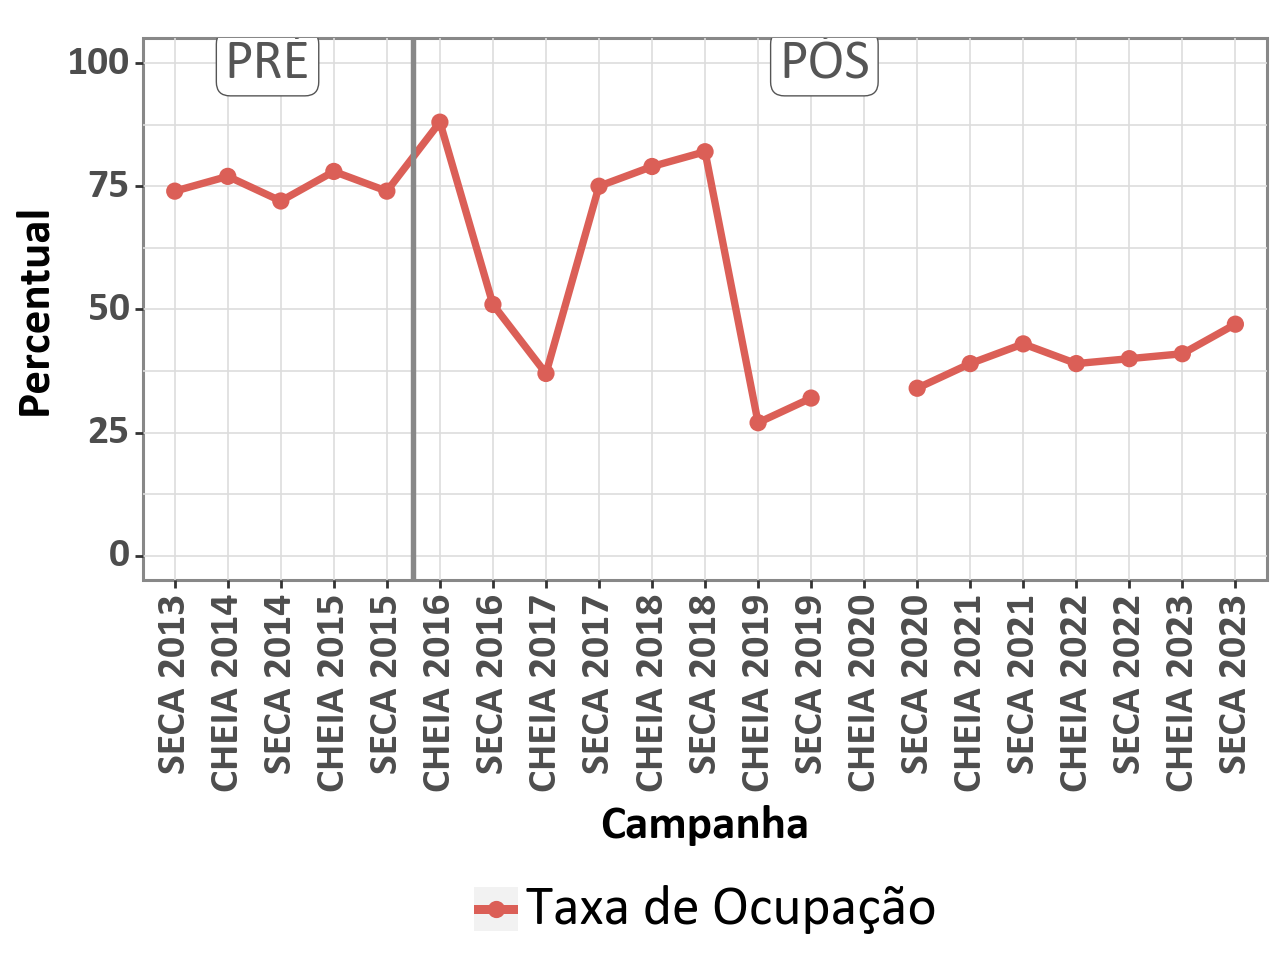

<Figure Size: (640 x 480)>

In [ ]:
tx_ocup_graf = grafico_1_variavel(tab = tab_ocup, var_y = 'Taxa de Ocupação')
tx_ocup_graf

In [ ]:
#tx_ocup_graf.save(filename=f'1.graf_taxa_ocupacao_{localidade}.png',
#                  width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                  path=path_graf)

In [ ]:
#tab_ocup.to_csv('tab_ocup.csv')

For mann-Kendall test:
https://www.statology.org/mann-kendall-test-python/
https://pypi.org/project/pymannkendall/
https://abhinaya-sridhar-rajaram.medium.com/mann-kendall-test-in-python-for-trend-detection-in-time-series-bfca5b55b


### Estatísticas 1.a - Mann Kendal - Taxa de Ocupação

In [ ]:
tab_ocup.head(2)

,periodo_padronizado2,Taxa de Ocupação,value
0,SECA 2013,Taxa de Ocupação,74.0
1,CHEIA 2014,Taxa de Ocupação,77.0


In [ ]:
tab_ocup = tab_ocup.sort_values(by='periodo_padronizado2')

In [ ]:
# mann-Kendall
teste_mann_kendall = mk.original_test(tab_ocup.sort_values(by='periodo_padronizado2')['value'])
print(f'Taxa Ocupação (Mann-Kendall): \nt = {teste_mann_kendall.Tau}\n'
      f'p-valor = {teste_mann_kendall.p.round(2)} \n'
      f'Tendency: {teste_mann_kendall.trend}')

Taxa Ocupação (Mann-Kendall): 
t = -0.25263157894736843
p-valor = 0.13 
Tendency: no trend


## Plot - Atividade Econômica Principal

Talvez a utilização deste gráfico deva ser reavaliada

In [ ]:
tab_ativ_princ = df_geral_local.pivot_table(index=['periodo_padronizado2', 'atividade_principal_de_geracao_de_renda'],
                          values='identificador',
                          aggfunc='count')
tab_ativ_princ.reset_index(inplace=True)
# para obter as % pra cada ano
for periodo in tab_ativ_princ['periodo_padronizado2'].unique():
    tab_ativ_princ.loc[
        tab_ativ_princ['periodo_padronizado2'] == periodo, 'Percentual'] = (tab_ativ_princ.loc[
        tab_ativ_princ['periodo_padronizado2'] == periodo, 'identificador']/(tab_ativ_princ.loc[
        tab_ativ_princ['periodo_padronizado2'] == periodo, 'identificador'].sum())).round(2)
tab_ativ_princ['Percentual'] = tab_ativ_princ['Percentual']*100
# filtrando para o gráfico:
tab_ativ_princ = tab_ativ_princ.loc[(tab_ativ_princ['atividade_principal_de_geracao_de_renda'].isin([
                'comercio', 'funcionalismo publico', 'produtor rural', 'garimpo', 'pesca']))]
# formato tidy
tab_ativ_princ = pd.melt(
    tab_ativ_princ[['periodo_padronizado2', 'atividade_principal_de_geracao_de_renda', 'Percentual']],
                    id_vars = ['periodo_padronizado2', 'atividade_principal_de_geracao_de_renda'])
# colocando zeros para os períodos que não tiveram obs para cada categoria, na linha dos graficos dos RCs anteriores
for periodo_padronizado2 in tab_ativ_princ['periodo_padronizado2'].unique():
    for atividade in tab_ativ_princ['atividade_principal_de_geracao_de_renda'].unique():
        if len(tab_ativ_princ[(tab_ativ_princ['atividade_principal_de_geracao_de_renda'] == atividade)
               & (tab_ativ_princ['periodo_padronizado2'] == periodo_padronizado2)]) == 0: # ou seja, não tem dado
            tab_ativ_princ.loc[len(tab_ativ_princ)] = [periodo_padronizado2, atividade, 'Percentual', 0]
        else:
            pass
# criando os valores n existentes de 2020 para plotar como vazio (aparecer apenas como label)
for atividade in tab_ativ_princ['atividade_principal_de_geracao_de_renda'].unique():
    tab_ativ_princ.loc[len(tab_ativ_princ)] = ['CHEIA 2020', atividade, 'Percentual', np.nan]
# transformando periodo em categorias --> e esclarecendo a ordem
tab_ativ_princ['periodo_padronizado2'] = pd.Categorical(
                    tab_ativ_princ['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
# ajustar o visual dos labels
for a, b in [('comercio', 'Comércio'), ('funcionalismo publico', 'Funcionalismo Público'),
             ('produtor rural', 'Produtor Rural'), ('garimpo', 'Garimpo'), ('pesca', 'Pesca')]:
    tab_ativ_princ['atividade_principal_de_geracao_de_renda'] = tab_ativ_princ[
            'atividade_principal_de_geracao_de_renda'].str.replace(a, b)

In [ ]:
tab_ativ_princ.head(2)

,periodo_padronizado2,atividade_principal_de_geracao_de_renda,variable,value
0,CHEIA 2013,Comércio,Percentual,12.0
1,CHEIA 2013,Funcionalismo Público,Percentual,8.0


C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 114 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 114 rows containing missing values.


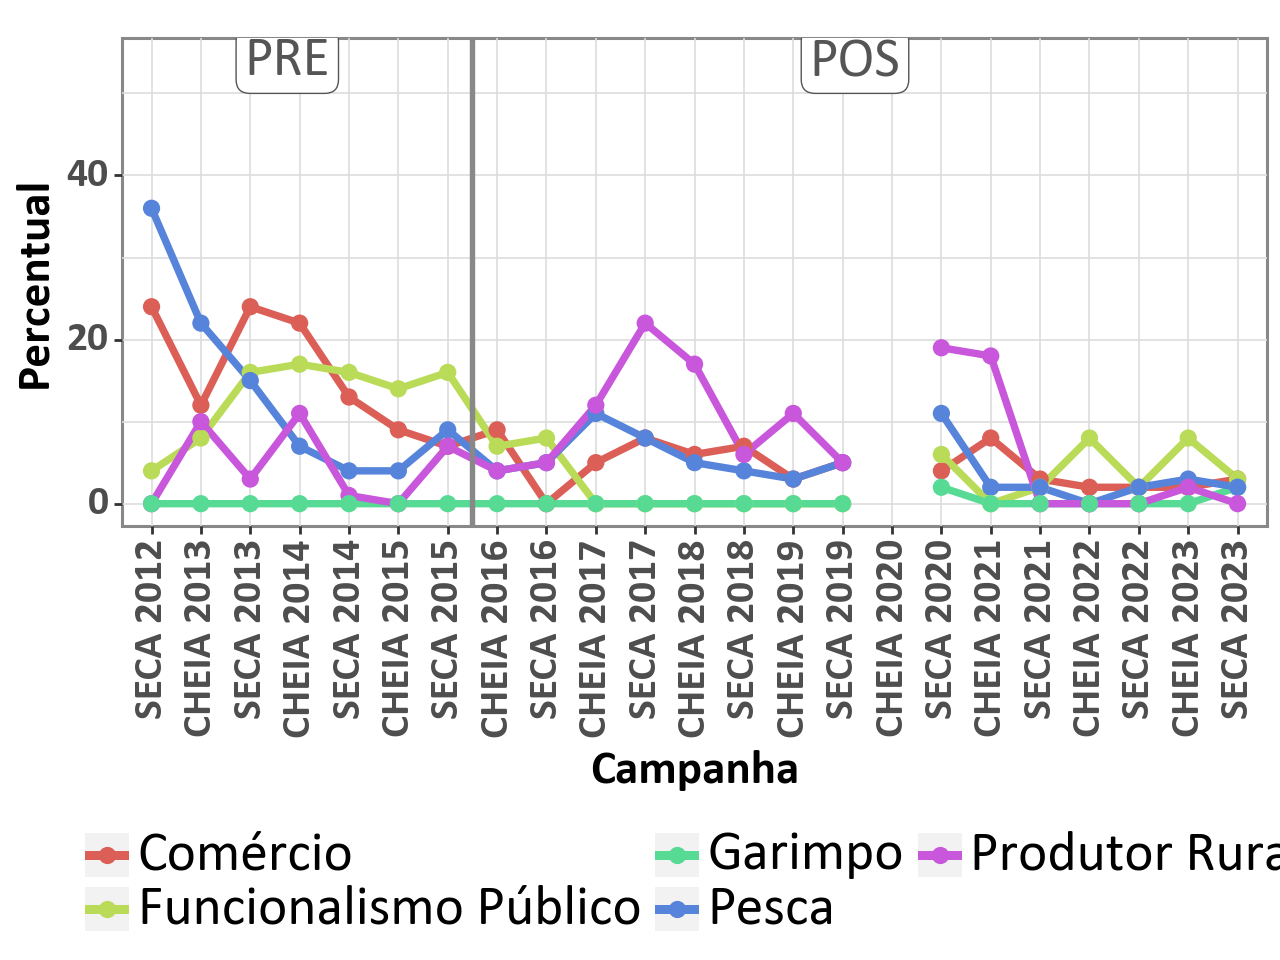

<Figure Size: (640 x 480)>

In [ ]:
tipos_ocup_graf = grafico_1_variavel(tab = tab_ativ_princ, var_y = 'atividade_principal_de_geracao_de_renda')
tipos_ocup_graf

In [ ]:
#tipos_ocup_graf.save(filename=f'2.graf_atividade_economica_princial_{localidade}.png',
#                  width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                 path=path_graf )

### Estatística - Atividade Principal

In [ ]:
# PENDENCIA --> Verificar Resultado com script do R
texto = 'O teste estatístico de Mann-Kendall revelou os seguintes coeficientes para tendência: '
for atividade in tab_ativ_princ['atividade_principal_de_geracao_de_renda'].unique():
    # teste pra cada opção
    if len(tab_ativ_princ.loc[tab_ativ_princ['atividade_principal_de_geracao_de_renda'] == atividade])>2:
        teste_mann_kendall = mk.original_test(
        tab_ativ_princ.loc[tab_ativ_princ['atividade_principal_de_geracao_de_renda'] == atividade].sort_values(
        by='periodo_padronizado2')['value'])
        texto += (f'{atividade} (t = {teste_mann_kendall.Tau.round(4)}; '
                    f'p-valor = {teste_mann_kendall.p.round(2)}), ')
        print(f' {atividade}\n'
              f't = {teste_mann_kendall.Tau.round(4)}\n'
              f'p-valor = {teste_mann_kendall.p.round(2)} \n'
              f'Tendency: {teste_mann_kendall.trend}\n')
texto.replace('.', ',')

 Comércio
t = -0.658
p-valor = 0.0 
Tendency: decreasing

 Funcionalismo Público
t = -0.2684
p-valor = 0.08 
Tendency: no trend

 Pesca
t = -0.5628
p-valor = 0.0 
Tendency: decreasing

 Produtor Rural
t = -0.0433
p-valor = 0.8 
Tendency: no trend

 Garimpo
t = 0.1299
p-valor = 0.1 
Tendency: no trend



'O teste estatístico de Mann-Kendall revelou os seguintes coeficientes para tendência: Comércio (t = -0,658; p-valor = 0,0), Funcionalismo Público (t = -0,2684; p-valor = 0,08), Pesca (t = -0,5628; p-valor = 0,0), Produtor Rural (t = -0,0433; p-valor = 0,8), Garimpo (t = 0,1299; p-valor = 0,1), '

In [ ]:
atividade = 'Produtor Rural'

In [ ]:
# Escrita relatório, qual a média de citação de determinada atividade ANTES E DEPOIS
tab_ativ_princ.loc[
    (tab_ativ_princ['periodo_padronizado2'] > 'CHEIA 2016')
    & (tab_ativ_princ['atividade_principal_de_geracao_de_renda'] == atividade)]['value'].mean()

8.357142857142858

In [ ]:
# Escrita relatório, qual a QTDD de citação de determinada atividade no periodo X
tab_ativ_princ.loc[
    (tab_ativ_princ['periodo_padronizado2'] == 'SECA 2023')
    & (tab_ativ_princ['atividade_principal_de_geracao_de_renda'] == atividade)]['value']

109    0.0
Name: value, dtype: float64

## Plot Atividade Econômica Complementar

In [ ]:
def possui_atividade_complementar(df):
    if df['atividade_complementar_de_geracao_de_renda'] in ['NAO TEM ATIVIDADE COMPLEMENTAR',
            'NAO INFORMADO', 'NAO SE APLICA','NAO POSSUI OCUPACAO SECUNDARIA',
            'NÃO POSSUI OCUPAÇÃO SECUNDÁRIA', 'NAO TEM OUTRO TRABALHO', 'NAO RESPONDEU']:
        val = 'Não'
    else:
        val = 'Sim'
    return val

In [ ]:
df_geral_local.loc[:, 'possui_atividade_secundaria'] = df_geral_local.apply(
            possui_atividade_complementar, axis=1)

In [ ]:
df_geral_local['possui_atividade_secundaria'].value_counts()

possui_atividade_secundaria
Não    1230
Sim     222
Name: count, dtype: int64

In [ ]:
tab_ativ_comp = df_geral_local.pivot_table(index=['periodo_padronizado2', 'possui_atividade_secundaria'],
                          values='identificador',
                          aggfunc='count')
tab_ativ_comp.reset_index(inplace=True)
# colocando valores nulos
tab_ativ_comp.loc[len(tab_ativ_comp)] = ['CHEIA 2020', 'Não', np.nan]
tab_ativ_comp.loc[len(tab_ativ_comp)] = ['CHEIA 2020', 'Sim', np.nan]
# para obter as % pra cada ano
for periodo in tab_ativ_comp['periodo_padronizado2'].unique():
    tab_ativ_comp.loc[
        tab_ativ_comp['periodo_padronizado2'] == periodo, 'Possui Atividade Complementar'] = (tab_ativ_comp.loc[
        tab_ativ_comp['periodo_padronizado2'] == periodo, 'identificador']/(tab_ativ_comp.loc[
        tab_ativ_comp['periodo_padronizado2'] == periodo, 'identificador'].sum())).round(2)
# filtrando apenas o sim para ficar igual ao gráfico
tab_ativ_comp = tab_ativ_comp.loc[tab_ativ_comp['possui_atividade_secundaria'] == 'Sim']
# tidy format
tab_ativ_comp = pd.melt(tab_ativ_comp[['periodo_padronizado2', 'Possui Atividade Complementar']],
       id_vars='periodo_padronizado2')
tab_ativ_comp['periodo_padronizado2'] = pd.Categorical(
                    tab_ativ_comp['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
tab_ativ_comp['value'] = tab_ativ_comp['value']*100

In [ ]:
tab_ativ_comp.head(2)

,periodo_padronizado2,variable,value
0,CHEIA 2013,Possui Atividade Complementar,15.0
1,CHEIA 2014,Possui Atividade Complementar,14.0


C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.


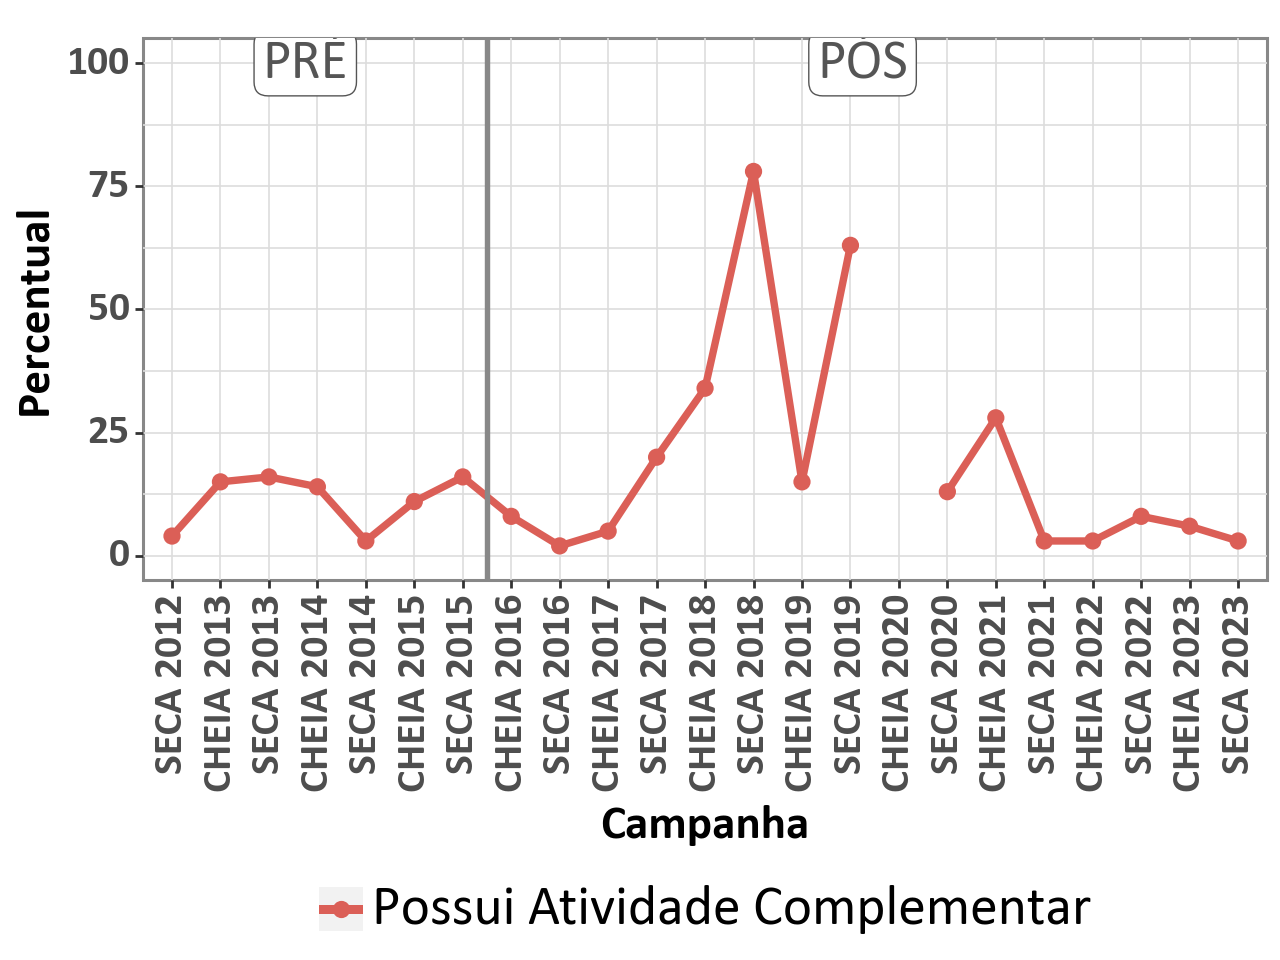

<Figure Size: (640 x 480)>

In [ ]:
graf_ativ_comp = grafico_1_variavel(tab_ativ_comp, 'variable')
graf_ativ_comp

In [ ]:
#graf_ativ_comp.save(filename=f'3.graf_possui_ativ_comp_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                path=path_graf)

### Teste estatístico

In [ ]:
teste_mann_kendall = mk.original_test(tab_ativ_comp.sort_values(by='periodo_padronizado2')['value'])
print(f't = {teste_mann_kendall.Tau}\n'
      f'p-valor = {teste_mann_kendall.p.round(2)} \n'
      f'Tendency: {teste_mann_kendall.trend}\n')

t = -0.06926406926406926
p-valor = 0.67 
Tendency: no trend



## Plot atividades economicas complementares


In [ ]:
df_geral_local['atividade_complementar_de_geracao_de_renda'].nunique()

67

In [ ]:
df_geral_local['atividade_complementar_de_geracao_de_renda'] = df_geral_local[
    'atividade_complementar_de_geracao_de_renda'].str.lower().apply(normalize)

In [ ]:
transformacao_ativ_complementar(df_geral_local)

In [ ]:
df_geral_local['atividade_complementar_de_geracao_de_renda'].nunique()

16

In [ ]:
tab_ativ_comp = df_geral_local.pivot_table(index=['periodo_padronizado2',
                                                  'atividade_complementar_de_geracao_de_renda'],
                          values='identificador',
                          aggfunc='count')
tab_ativ_comp.reset_index(inplace=True)
# para obter as % pra cada ano
for periodo in tab_ativ_comp['periodo_padronizado2'].unique():
    tab_ativ_comp.loc[
        tab_ativ_comp['periodo_padronizado2'] == periodo, 'Percentual'] = (tab_ativ_comp.loc[
        tab_ativ_comp['periodo_padronizado2'] == periodo, 'identificador']/(tab_ativ_comp.loc[
        tab_ativ_comp['periodo_padronizado2'] == periodo, 'identificador'].sum())).round(2)
# filtrando para o gráfico:
tab_ativ_comp = tab_ativ_comp.loc[(tab_ativ_comp['atividade_complementar_de_geracao_de_renda'].isin(
                    ['agricultura / agropecuaria',
                     'funcionalismo publico',
                     'servicos gerais / diarista',
                     'garimpo',
                     'pesca',
                     'comercio']))]
# formato tidy
tab_ativ_comp = pd.melt(
    tab_ativ_comp[['periodo_padronizado2', 'atividade_complementar_de_geracao_de_renda', 'Percentual']],
                    id_vars = ['periodo_padronizado2', 'atividade_complementar_de_geracao_de_renda'])
# colocando zeros para os períodos que não tiveram obs para cada categoria, na linha dos graficos dos RCs anteriores
for periodo_padronizado2 in tab_ativ_comp['periodo_padronizado2'].unique():
    for atividade in tab_ativ_comp['atividade_complementar_de_geracao_de_renda'].unique():
        if len(tab_ativ_comp[(tab_ativ_comp['atividade_complementar_de_geracao_de_renda'] == atividade)
               & (tab_ativ_comp['periodo_padronizado2'] == periodo_padronizado2)]) == 0: # ou seja, não tem dado
            tab_ativ_comp.loc[len(tab_ativ_comp)] = [periodo_padronizado2, atividade, 'Percentual', 0]
        else:
            pass
# criando os valores n existentes de 2020 para plotar como vazio (aparecer apenas como label)
for atividade in tab_ativ_comp['atividade_complementar_de_geracao_de_renda'].unique():
    tab_ativ_comp.loc[len(tab_ativ_comp)] = ['CHEIA 2020', atividade, 'Percentual', np.nan]
# transformando peripadr em categorias --> e esclarecendo a ordem
tab_ativ_comp['periodo_padronizado2'] = pd.Categorical(
                    tab_ativ_comp['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
# ajustar o visual dos labels
for a, b in [('agricultura / agropecuaria', 'Agricultura / Agropecuária'),
             ('funcionalismo publico', 'Funcionalismo Público'),
             ('servicos gerais / diarista', 'Serviços Gerais / Diarista'),
             ('garimpo', 'Garimpo'),
             ('pesca', 'Pesca'),
             ('comercio', 'Comércio')]:
    tab_ativ_comp['atividade_complementar_de_geracao_de_renda'] = tab_ativ_comp[
            'atividade_complementar_de_geracao_de_renda'].str.replace(a, b)
tab_ativ_comp['value'] = tab_ativ_comp['value']*100

In [ ]:
tab_ativ_comp.head(2)

,periodo_padronizado2,atividade_complementar_de_geracao_de_renda,variable,value
0,CHEIA 2013,Agricultura / Agropecuária,Percentual,3.0
1,CHEIA 2013,Pesca,Percentual,7.0


C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 94 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 94 rows containing missing values.


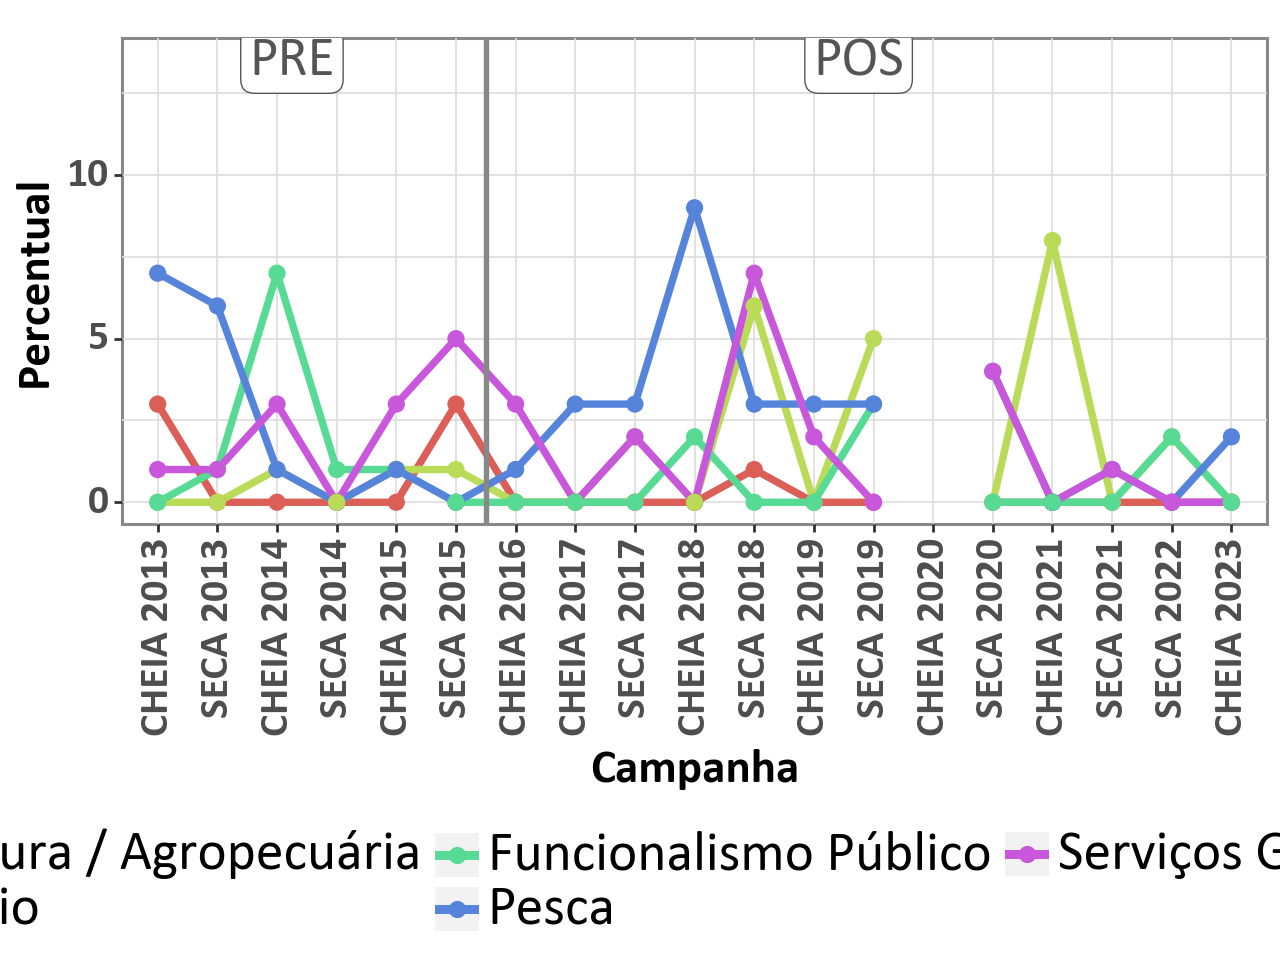

<Figure Size: (640 x 480)>

In [ ]:
tipo_ativ_comp = grafico_1_variavel(tab_ativ_comp, 'atividade_complementar_de_geracao_de_renda')
tipo_ativ_comp

In [ ]:
#tipo_ativ_comp.save(filename=f'4.graf_quais_ativ_comp_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#               path=path_graf)

In [ ]:
tab_ativ_comp.head(2)

,periodo_padronizado2,atividade_complementar_de_geracao_de_renda,variable,value
0,CHEIA 2013,Agricultura / Agropecuária,Percentual,3.0
1,CHEIA 2013,Pesca,Percentual,7.0


In [ ]:
# PENDENCIA --> Verificar resultados com os do script
texto = 'O teste estatístico de Mann-Kendall revelou os seguintes coeficientes para tendência: '
for atividade in tab_ativ_comp['atividade_complementar_de_geracao_de_renda'].unique():
    # teste pra cada opção # df de cada opcao tem que ser maior q 1 pra fazer o teste
    if len(tab_ativ_comp.loc[(tab_ativ_comp['atividade_complementar_de_geracao_de_renda'] == atividade)
                 & (tab_ativ_comp['value'].notna())])>1: # não dá para ver tendencia se tiver apenas 1 obs
        teste_mann_kendall = mk.original_test(
        tab_ativ_comp.loc[tab_ativ_comp['atividade_complementar_de_geracao_de_renda'] == atividade].sort_values(
                by='periodo_padronizado2')['value'])
        texto += (f'{atividade} (t = {teste_mann_kendall.Tau.round(4)}; '
                    f'p-valor = {teste_mann_kendall.p.round(2)}), ')
        print(f'{atividade}\n'
              f't = {teste_mann_kendall.Tau}\n'
              f'p-valor = {teste_mann_kendall.p.round(2)} \n'
              f'Tendency: {teste_mann_kendall.trend}\n')
texto.replace('.', ',')

Agricultura / Agropecuária
t = -0.1503267973856209
p-valor = 0.19 
Tendency: no trend

Pesca
t = -0.09803921568627451
p-valor = 0.59 
Tendency: no trend

Serviços Gerais / Diarista
t = -0.1895424836601307
p-valor = 0.27 
Tendency: no trend

Comércio
t = 0.1437908496732026
p-valor = 0.38 
Tendency: no trend

Funcionalismo Público
t = -0.13071895424836602
p-valor = 0.41 
Tendency: no trend



'O teste estatístico de Mann-Kendall revelou os seguintes coeficientes para tendência: Agricultura / Agropecuária (t = -0,1503; p-valor = 0,19), Pesca (t = -0,098; p-valor = 0,59), Serviços Gerais / Diarista (t = -0,1895; p-valor = 0,27), Comércio (t = 0,1438; p-valor = 0,38), Funcionalismo Público (t = -0,1307; p-valor = 0,41), '

## Plot Produção agropecuária

In [ ]:
df_geral_local['possui_producao_agropecuaria'].value_counts(normalize=True)

possui_producao_agropecuaria
NAO              0.873278
SIM              0.126033
NAO SE APLICA    0.000689
Name: proportion, dtype: float64

In [ ]:
df_geral_local.loc[df_geral_local['possui_producao_agropecuaria'] == 'NAO', 'possui_producao_agropecuaria'] = 'Não'
df_geral_local.loc[df_geral_local['possui_producao_agropecuaria'] == 'SIM', 'possui_producao_agropecuaria'] = 'Sim'

In [ ]:
df_geral_local = df_geral_local[df_geral_local['possui_producao_agropecuaria']!='NAO SE APLICA']

In [ ]:
# PENDENCIA --> tem que filtrar antes apenas 'sim' e 'nao' em columns
tab_prod_agric = pd.crosstab(index=df_geral_local['periodo_padronizado2'],
                            columns=df_geral_local['possui_producao_agropecuaria'])
tab_prod_agric.reset_index(inplace=True)
# colocando valores nulos
tab_prod_agric.loc[len(tab_prod_agric)] = ['CHEIA 2020', np.nan, np.nan]
# calculando a taxa
tab_prod_agric['Pratica Atividade Agropecuária'] = (tab_prod_agric['Sim']/(tab_prod_agric['Sim']+tab_prod_agric['Não'])).round(2)
# selecionando apenas colunas necessárias
tab_prod_agric = tab_prod_agric[['periodo_padronizado2', 'Pratica Atividade Agropecuária']]
tab_prod_agric['periodo_padronizado2'] = pd.Categorical(
                    tab_prod_agric['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
tab_prod_agric = tab_prod_agric.melt(id_vars='periodo_padronizado2')
tab_prod_agric['value'] = tab_prod_agric['value']*100
tab_prod_agric.head(2)

,periodo_padronizado2,possui_producao_agropecuaria,value
0,CHEIA 2013,Pratica Atividade Agropecuária,4.0
1,CHEIA 2014,Pratica Atividade Agropecuária,3.0


C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.


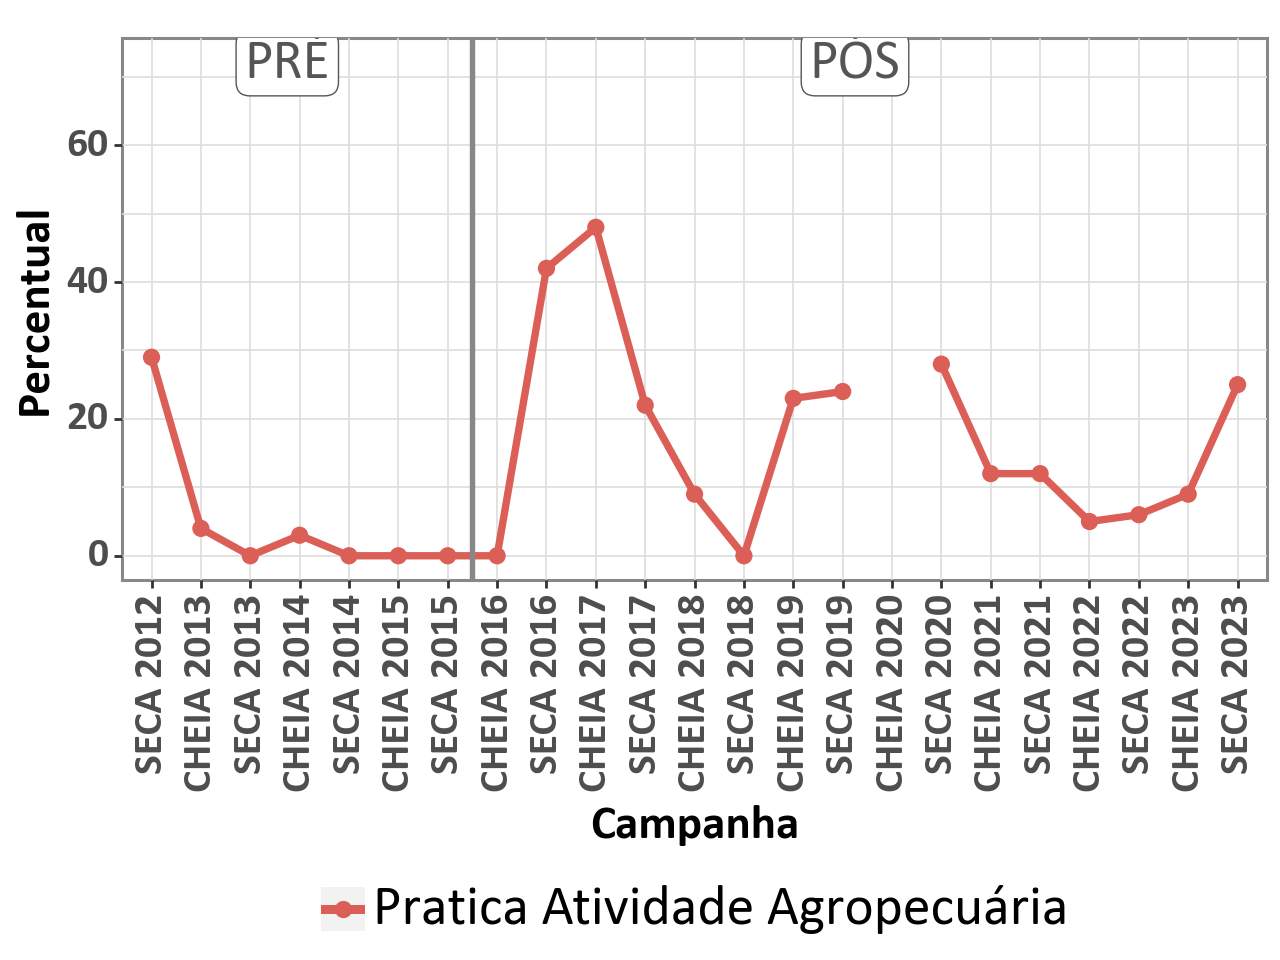

<Figure Size: (640 x 480)>

In [ ]:
graf_prod_agric = grafico_1_variavel(tab_prod_agric, 'possui_producao_agropecuaria')
graf_prod_agric

In [ ]:
#graf_prod_agric.save(filename=f'5.graf_tem_prod_agrop_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                        path=path_graf)

### Estatística

In [ ]:
# PENDENCIA --> Coeficientes distintos do script do R
teste_mann_kendall = mk.original_test(tab_prod_agric.sort_values(by='periodo_padronizado2')['value'])
print(f't = {teste_mann_kendall.Tau}\n'
      f'p-valor = {teste_mann_kendall.p.round(4)} \n'
      f'Tendency: {teste_mann_kendall.trend}\n')

t = 0.17316017316017315
p-valor = 0.2656 
Tendency: no trend



In [ ]:
# Para escrita do relatório
tab_prod_agric.query('periodo_padronizado2 == "SECA 2022"')

,periodo_padronizado2,possui_producao_agropecuaria,value
20,SECA 2022,Pratica Atividade Agropecuária,6.0


## Plot - Destino da Comercialização

In [ ]:
df_prod = pd.read_excel('base.xlsx', sheet_name = 'TABELA PRODUTOS CULTIVADOS', header=0)
df_prod.columns = df_prod.columns.str.lower().str.strip().str.replace(' ', '_')
df_prod['quantidade_produzida'] = pd.to_numeric(df_prod['quantidade_produzida'], errors='coerce')
df_prod['quantidade_comercializada'] = pd.to_numeric(df_prod['quantidade_comercializada'], errors='coerce')

In [ ]:
len(df_prod)

9309

In [ ]:
df_prod = df_prod.merge(df_geral_local[colunas_df_geral], how='inner', on='identificador')

In [ ]:
len(df_prod)

718

In [ ]:
df_prod.head(2)

,das,identificador,produto,produto_categorizado,area_x,unidade_de_area_cultivada,quantidade_produzida,unidade_quantidade_produzida,"caso_outro,_especificar1",producao_comercializada,quantidade_comercializada,unidade_quantidade_comercializada,caso_outros_2,voce_mesmo,local_comercializado_1,local_comercializado_2,municipio_comercializado_1,municipio_comercializado_2,valor_comercializado,via_escoamento,nome_via_escoamento_1,nome_via_escoamento_2,nome_via_escoamento_3,transporte_1,transporte_2,tempo_gasto,principal_municipio,frequencia_comercializado,valor_transporte,data,pre_/_pos,mes_ano,ano,periodo_padronizado,periodo_padronizado2,local_da_pesquisa,local_da_residencia,area_y
0,NaN,6,BANANA,FRUTAS,0.25,HECTARES,3600.0,KG,NAO SE APLICA,SIM,3600.0,KG,NAO SE APLICA,PERGUNTA REALIZADA NO 14º,COMERCIANTE / ATRAVESSADOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-15,PRE,11_2012,2012,SECA,SECA 2012,BELO MONTE II - VITORIA DO XINGU,BELO MONTE II - VITORIA DO XINGU,AREA URBANA-2
1,NaN,6,MANDIOCA,MANDIOCA,0.1,HECTARES,300.0,KG,NAO SE APLICA,SIM,40.0,KG,NAO SE APLICA,PERGUNTA REALIZADA NO 14º,COMERCIANTE / ATRAVESSADOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-15,PRE,11_2012,2012,SECA,SECA 2012,BELO MONTE II - VITORIA DO XINGU,BELO MONTE II - VITORIA DO XINGU,AREA URBANA-2


### Número de Culturas

In [ ]:
df_prod['ano'] = df_prod['ano'].astype(int)

In [ ]:
df_prod.loc[df_prod['ano'] < 2016]['produto'].nunique()

12

In [ ]:
df_prod.loc[df_prod['ano'] >= 2016]['produto'].nunique()

47

### Area cultivada

Para essas variáveis de área plantada não é possível fazer comparações ao longo do tempo, porque em determinados anos quase todas as medidas de área são feitas ou em hectares ou em pés/m², dificultando a comparação ao longo dos anos (ver tabela ao final da análise)

In [ ]:
df_grupo_fam.loc[df_grupo_fam['posicao_na_ocupacao_relacao_de_trabalho'].str.contains(
    a), 'posicao_na_ocupacao_relacao_de_trabalho'] = b

In [ ]:
df_prod['unidade_de_area_cultivada'] = df_prod['unidade_de_area_cultivada'].apply(normalize)

In [ ]:
for a, b in [('PES', 'PES'),
             ('HECTARE', 'HECTARE'),
             ('TAREFA', 'TAREFA OU LINHA'),
             ('ALQUEIRE', 'ALQUEIRE/ALQUEIRO')]:
    df_prod.loc[df_prod['unidade_de_area_cultivada'].str.contains(a), 'unidade_de_area_cultivada'] = b

In [ ]:
df_prod['unidade_de_area_cultivada'].value_counts(normalize=True)

unidade_de_area_cultivada
HECTARE                   0.625348
PES                       0.199164
NAO SABE/NAO RESPONDEU    0.077994
NAO SE APLICA             0.036212
M2                        0.034819
TAREFA OU LINHA           0.022284
ALQUEIRE/ALQUEIRO         0.004178
Name: proportion, dtype: float64

In [ ]:
df_prod['area_x'] = pd.to_numeric(df_prod['area_x'], errors='coerce')

In [ ]:
# ATENÇÃO: area cultiva não por família, mas por produto
df_prod.loc[df_prod['unidade_de_area_cultivada'] == 'HECTARE']['area_x'].describe()

count    449.000000
mean       0.301059
std        2.091673
min        0.000100
25%        0.000400
50%        0.000800
75%        0.002000
max       24.000000
Name: area_x, dtype: float64

In [ ]:
# tamanho total da area cultivada (todos produtos) por familia em cada periodo
tab_tam_area_cultiv = df_prod.loc[df_prod['unidade_de_area_cultivada'] == 'HECTARE'].pivot_table(
    index=['identificador', 'ano', 'periodo_padronizado2'],
    values='area_x',
    aggfunc='sum')
tab_tam_area_cultiv.reset_index(inplace=True)

In [ ]:
# tamanho médio cultivado por cada família em cada período
tab_tam_area_cultiv.pivot_table(index=['ano', 'periodo_padronizado2'],
                               values='area_x',
                               aggfunc='mean').round(2).tail(5)

area_x
ano  periodo_padronizado2        
2018 CHEIA 2018              0.00
2019 CHEIA 2019              0.00
     SECA 2019               6.72
2020 SECA 2020               0.01
2021 CHEIA 2021              1.50

### Tabela. % criação de animais na propriedade

In [ ]:
df_geral_local['o_senhor_cria_animais'].value_counts()

o_senhor_cria_animais
NAO              1254
SIM               196
NAO RESPONDEU       1
Name: count, dtype: int64

In [ ]:
df_geral_local.loc[df_geral_local['o_senhor_cria_animais'] == 'NAO',
                  'o_senhor_cria_animais'] = 'Não'
df_geral_local.loc[df_geral_local['o_senhor_cria_animais'] == 'SIM',
                  'o_senhor_cria_animais'] = 'Sim'
df_geral_local.loc[df_geral_local['o_senhor_cria_animais'] == 'NAO RESPONDEU',
                  'o_senhor_cria_animais'] = np.nan

In [ ]:
tab_criacao_anim = pd.crosstab(index=df_geral_local['periodo_padronizado2'],
                            columns=df_geral_local['o_senhor_cria_animais'])
tab_criacao_anim.reset_index(inplace=True)
# colocando valores nulos
tab_criacao_anim.loc[len(tab_criacao_anim)] = ['CHEIA 2020', np.nan, np.nan]
# calculando a taxa
tab_criacao_anim['Pratica Criação de Animais'] = (tab_criacao_anim['Sim']/(tab_criacao_anim['Sim']+tab_criacao_anim['Não'])).round(2)
# selecionando apenas colunas necessárias
tab_criacao_anim = tab_criacao_anim[['periodo_padronizado2', 'Pratica Criação de Animais']]
tab_criacao_anim['periodo_padronizado2'] = pd.Categorical(
                    tab_criacao_anim['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
tab_criacao_anim = tab_criacao_anim.melt(id_vars='periodo_padronizado2')
tab_criacao_anim['value'] = tab_criacao_anim['value']*100
tab_criacao_anim.head(2)

,periodo_padronizado2,o_senhor_cria_animais,value
0,CHEIA 2013,Pratica Criação de Animais,3.0
1,CHEIA 2014,Pratica Criação de Animais,3.0


C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.


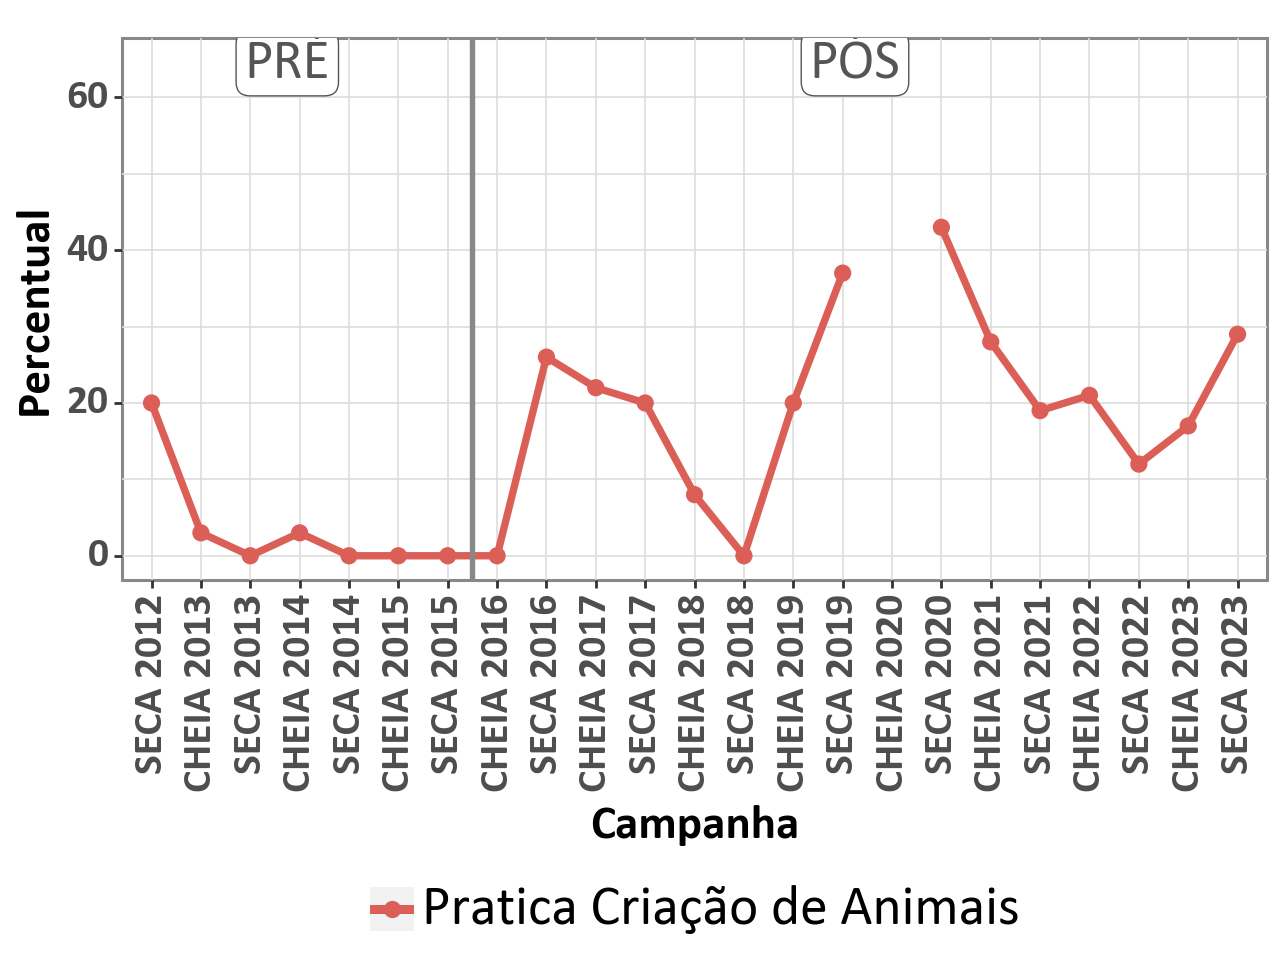

<Figure Size: (640 x 480)>

In [ ]:
graf_criacao_anim = grafico_1_variavel(tab_criacao_anim, 'o_senhor_cria_animais')
graf_criacao_anim

In [ ]:
#graf_criacao_anim.save(filename=f'11.graf_criacao_animais_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                path = path_graf)

### Estatística - Criação de animais

In [ ]:
# PENDENCIA --> Teste difere do script do R
teste_mann_kendall = mk.original_test(tab_criacao_anim.sort_values(by='periodo_padronizado2')['value'])
print(f't = {teste_mann_kendall.Tau}\n'
      f'p-valor = {teste_mann_kendall.p.round(2)} \n'
      f'Tendency: {teste_mann_kendall.trend}\n')

t = 0.3203463203463203
p-valor = 0.04 
Tendency: increasing



In [ ]:
# Quantos relataram criar animais na ultima campanha
tab_criacao_anim.loc[tab_criacao_anim['periodo_padronizado2'] == 'SECA 2023']

,periodo_padronizado2,o_senhor_cria_animais,value
21,SECA 2023,Pratica Criação de Animais,29.0


# Análise Renda Familiar/Gasto/Pobreza

## Plot Renda Familiar REAL  

por periodo padronizado

In [ ]:
# agrupando a renda por família --> soma do que cada um recebe
tab_rend_fam = df_grupo_fam[df_grupo_fam['area']==localidade].pivot_table(index='identificador',
                         values='remuneracao_mensal_real',
                         aggfunc={'remuneracao_mensal_real': 'sum'}).round(4)

# colocar None para não atrapalhar cálculo de média se for fazer depois
tab_rend_fam.loc[tab_rend_fam['remuneracao_mensal_real']==0, 'remuneracao_mensal_real'] = None
# join com outras info e pivot tab
tab_rend_fam = tab_rend_fam.merge(
                   df_grupo_fam[['identificador', 'ano', 'periodo_padronizado', 'periodo_padronizado2']],
                   on='identificador', how='left')
tab_rend_fam = tab_rend_fam.pivot_table(index=['periodo_padronizado2', 'periodo_padronizado'],
                        values=['remuneracao_mensal_real'],
                        aggfunc=[np.median, np.std]).round(2)
tab_rend_fam.reset_index(inplace=True)
tab_rend_fam.loc[(len(tab_rend_fam))] = ['CHEIA 2020', 'CHEIA', np.nan, np.nan]
tab_rend_fam.columns = tab_rend_fam.columns.droplevel(1)
tab_rend_fam['periodo_padronizado2'] = pd.Categorical(
                    tab_rend_fam['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)

C:\Users\Lord-\AppData\Local\Temp\ipykernel_13528\550963776.py:12: FutureWarning: The provided callable <function median at 0x000001CE3B91D040> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
C:\Users\Lord-\AppData\Local\Temp\ipykernel_13528\550963776.py:12: FutureWarning: The provided callable <function std at 0x000001CE3A814A60> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


In [ ]:
tab_rend_fam.head(2)

,periodo_padronizado2,periodo_padronizado,median,std
0,CHEIA 2014,CHEIA,2610.0,2622.98
1,CHEIA 2015,CHEIA,2400.0,1663.19


In [ ]:
tab_rend_fam.sort_values(by='periodo_padronizado2', inplace=True)

In [ ]:
tab_rend_fam.to_excel(path_graf + fr'\tab_rend_fam_{localidade}.xlsx')

In [ ]:
# function
def grafico_barra(tab,
                  label_x,
                  y_value = 'median',
                  y_std = 'std',
                  fill_color = 'periodo_padronizado'):
    find_x_positions_to_plot(tab) # get v_line_x, pre_x, pos_x vars

    max_medida = tab[y_value].max()
    max_dp = tab[y_std].max()
    maximo = max_medida + max_dp

    graf = (ggplot(data = tab)
     + aes(x='periodo_padronizado2', y = y_value,
           fill = fill_color)
     + geom_bar(width = 0.8, position=position_dodge(),
                stat='identity',
                colour='black')
     + geom_errorbar(aes(ymin=y_value, ymax=f'{y_value}+{y_std}'), width=.2)
     + ylim(0, maximo)
      + geom_label(mapping = aes(x = pre_x,
                                 y = maximo ,
                                label=gplt_lab['PRÉ']),  size=20, angle=0, color='#555555',
                                label_padding = 0.15,
                                label_size = 0.5,
                                inherit_aes=False)
     + geom_label(mapping = aes( x = pos_x,
                                y = maximo ,
                                label=gplt_lab['PÓS']), size=20, angle=0, color='#555555',
                                label_padding = 0.15,
                                label_size = 0.5,
                                inherit_aes=False)
     + geom_vline(xintercept = v_line_x,
                  size=1.1, color='#888888')
     + ylab(label_x)
     + xlab('Campanha')
     + theme(legend_position = 'bottom',
              #legend_box_spacing = 1.2,
              legend_title = element_blank(),
              legend_text = element_text(size=20),
              panel_grid_major_x = element_line(color='#DDDDDD', size=0.6),
              panel_grid_major_y = element_line(color='#DDDDDD', size=0.6),
              panel_grid_minor_y = element_line(color='#DDDDDD', size=0.6),
              panel_background = element_rect(fill='#FFFFFF', color='#888888', size=1.1),
              panel_border = element_rect(color='#888888'),
              axis_title_x = element_text(size=15, face='bold'),
              axis_title_y = element_text(size=15, face='bold'),
              axis_text_x = element_text(size=15, face='bold', rotation=90),
              axis_text_y = element_text(size=15, face='bold'),
              text = element_text(family = 'Calibri'))
     + guides(colour=guide_legend(nrow=2))
    )
    return graf

C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 20 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 20 rows containing missing values.


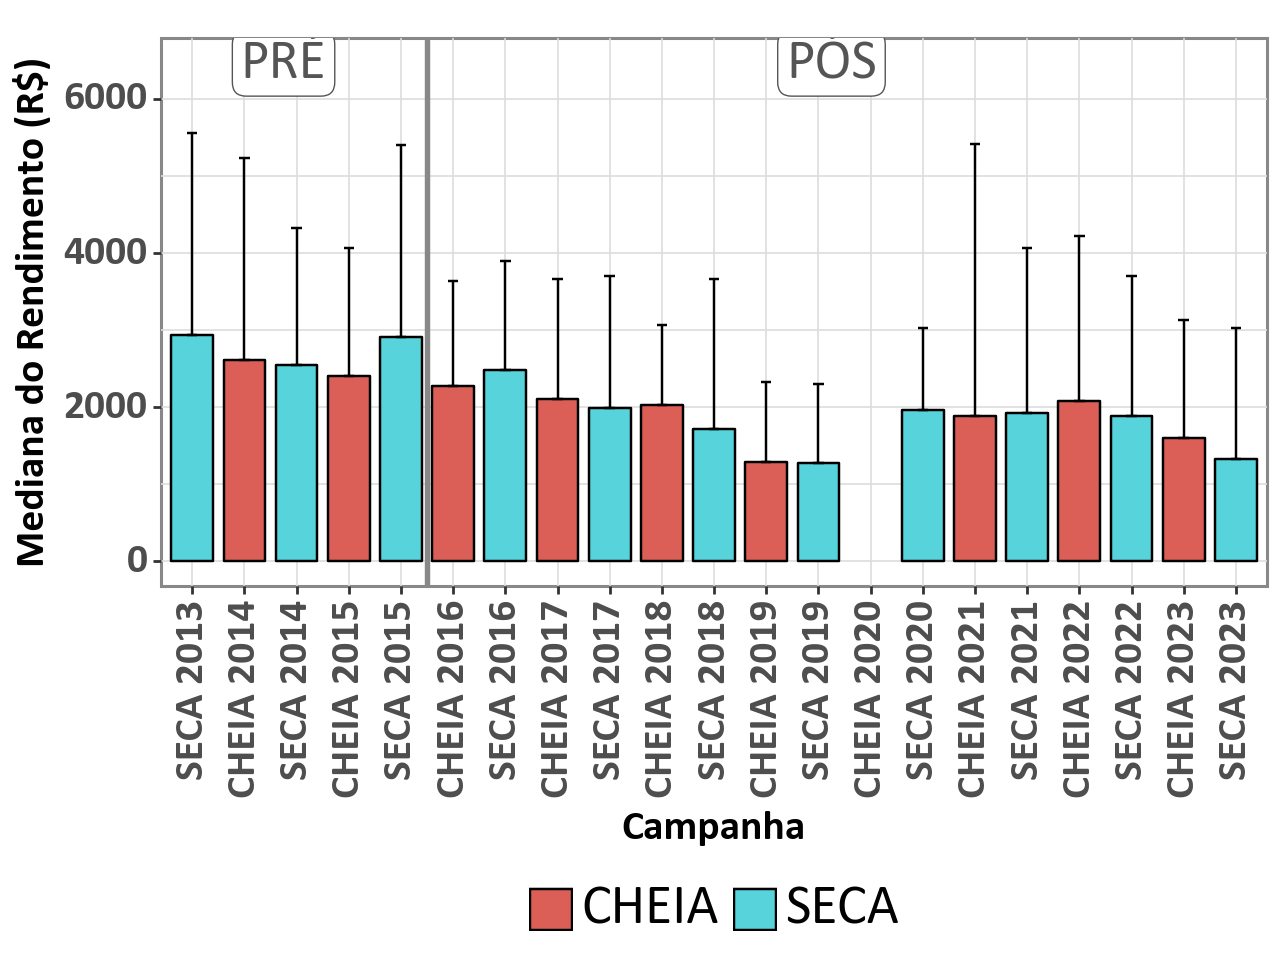

<Figure Size: (640 x 480)>

In [ ]:
graf_rend_fam = grafico_barra(tab = tab_rend_fam,
                              y_value = 'median',
                              y_std = 'std',
                              fill_color = 'periodo_padronizado',
                              label_x = 'Mediana do Rendimento (R$)')
graf_rend_fam

In [ ]:
#graf_rend_fam.save(filename=f'19.graf_rend_familiar_real_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
 #               path=path_graf)

### Estatística Tendência - Rendimento Familiar Cheia x Seca

In [ ]:
for campanha in tab_rend_fam['periodo_padronizado'].unique():
    # teste pra cada opção
    teste_mann_kendall = mk.original_test(
    tab_rend_fam.loc[tab_rend_fam['periodo_padronizado'] == campanha].sort_values(by='periodo_padronizado2')['median'])
    print(f'{campanha}\n'
          f't = {teste_mann_kendall.Tau}\n'
          f'p-valor = {teste_mann_kendall.p.round(2)} \n'
          f'Tendency: {teste_mann_kendall.trend}\n')

SECA
t = -0.7090909090909091
p-valor = 0.0 
Tendency: decreasing

CHEIA
t = -0.7222222222222222
p-valor = 0.01 
Tendency: decreasing



### t-student pareado - diferença RENDIMENTO entre cheia e seca

In [ ]:
# ATENÇÃO --> t-student pareado só pode ser feito com amostras de mesmo tamanho
# É possível que alguma das temporadas tenha de ser diminuida uma obs --> em geral a 1ª
renda_cheia = tab_rend_fam.loc[tab_rend_fam['periodo_padronizado'] == 'CHEIA'].sort_values(
                                                by='periodo_padronizado2')['median']
renda_seca = tab_rend_fam.loc[tab_rend_fam['periodo_padronizado'] == 'SECA'].sort_values(
                                                by='periodo_padronizado2')['median']
renda_seca = renda_seca[1:] # Codigo necessário quando um vetor é maior do que o outro
# Test t student pareado --> para amostras medidas em duas condições diferentes
stat, p = ttest_rel(renda_cheia, renda_seca, nan_policy='omit')
if p > 0.05:
    print("Não há diferença estatística entre a renda na cheia e na seca")
else:
    print("As duas amostras são significativamente diferentes")

Não há diferença estatística entre a renda na cheia e na seca


In [ ]:
stat, p

(0.26912592103693106, 0.7946435407395968)

## Plot Gasto Familiar Real

Tomar cuidado com a tabela pq tem uma categoria Z-TOTAL, dentro de identificação que é o somatório das demais

In [ ]:
df_gasto = pd.read_excel('base.xlsx', sheet_name='TABELA GASTOS MENSAIS', header=0)
df_gasto.columns = df_gasto.columns.str.lower().str.strip().str.replace(' ', '_')
df_gasto.columns = ['identificador', 'id_identificacao', 'identificacao', 'valor_gasto',
       'caso_outro_especificar']
df_gasto = df_gasto.loc[df_gasto['identificacao']!='Z-TOTAL']
df_gasto['valor_gasto'] = pd.to_numeric(df_gasto['valor_gasto'], errors='coerce')

In [ ]:
df_gasto.head(3)

,identificador,id_identificacao,identificacao,valor_gasto,caso_outro_especificar
0,1,1,AGUA,0.0,NAO SE APLICA
1,1,2,ALIMENTACAO,180.0,NAO SE APLICA
2,1,3,ALIMENTACAO / PRODUTOS DE LIMPEZA,0.0,NAO SE APLICA


In [ ]:
# gasto por familia e trazendo variaveis de periodo
tab_gasto = df_gasto.pivot_table(index='identificador', values='valor_gasto', aggfunc='sum').merge(
    df_geral_local[['identificador','ano','periodo_padronizado', 'periodo_padronizado2', 'mes/ano']],
    on='identificador', how='left')
# deflacionando gasto por familia
tab_gasto = tab_gasto.merge(ipca[['mes/ano', 'multiplier']])
tab_gasto['gasto_real'] = (tab_gasto['valor_gasto']*tab_gasto['multiplier']
                                          ).round(2)
# media de gasto por família em cada período
tab_gasto = tab_gasto.pivot_table(index=['periodo_padronizado', 'periodo_padronizado2'],
                     values='gasto_real',
                     aggfunc=['mean', 'std']).round(2)
tab_gasto.columns = tab_gasto.columns.droplevel(0)
tab_gasto.columns = ['media_gasto', 'std_gasto']
tab_gasto.reset_index(inplace=True)
tab_gasto.loc[len(tab_gasto)] = ['CHEIA', 'CHEIA 2020', np.nan, np.nan]
tab_gasto['periodo_padronizado2'] = pd.Categorical(
                    tab_gasto['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
max_media = tab_gasto['media_gasto'].max()
max_dp = tab_gasto['std_gasto'].max()
maximo = max_media + max_dp

In [ ]:
tab_gasto.head()

,periodo_padronizado,periodo_padronizado2,media_gasto,std_gasto
0,CHEIA,CHEIA 2013,1585.66,808.89
1,CHEIA,CHEIA 2014,1324.47,573.25
2,CHEIA,CHEIA 2015,1084.41,343.73
3,CHEIA,CHEIA 2016,1240.10,517.06
4,CHEIA,CHEIA 2017,2250.69,1887.74


In [ ]:
tab_gasto.sort_values(by='periodo_padronizado2', inplace=True)
tab_gasto.to_excel(path_graf + fr'\tab_gasto_{localidade}.xlsx')

C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 22 rows containing missing values.


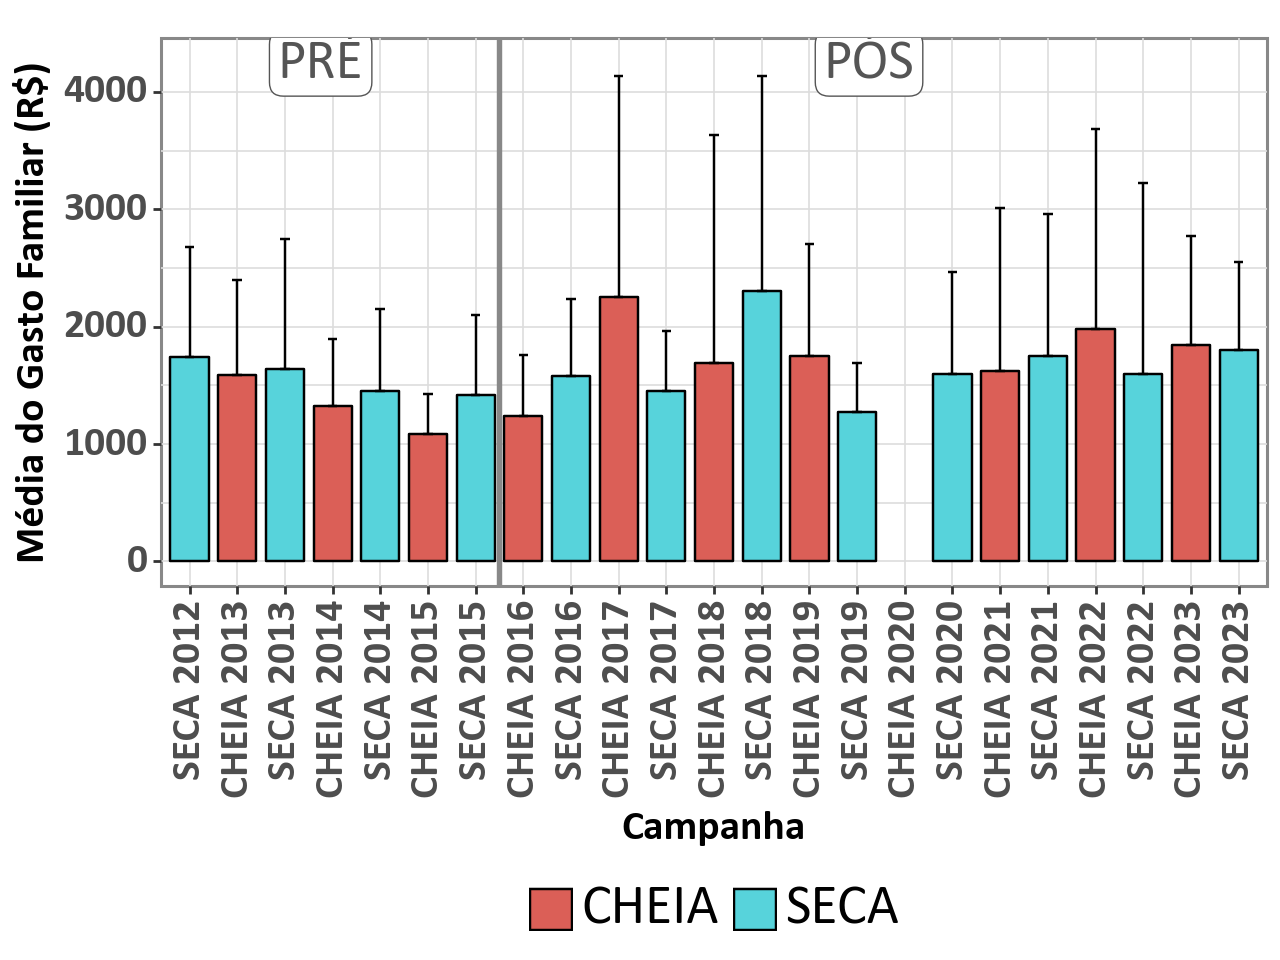

<Figure Size: (640 x 480)>

In [ ]:
graf_gasto_fam = grafico_barra(tab = tab_gasto,
                              y_value = 'media_gasto',
                              y_std = 'std_gasto',
                              fill_color = 'periodo_padronizado',
                              label_x = 'Média do Gasto Familiar (R$)')
graf_gasto_fam

In [ ]:
#graf_gasto_fam.save(filename=f'20.graf_gasto_familiar_real_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                path=path_graf)

In [ ]:
for campanha in tab_gasto['periodo_padronizado'].unique():
    # teste pra cada opção
    teste_mann_kendall = mk.original_test(
    tab_gasto.loc[tab_gasto['periodo_padronizado'] == campanha].sort_values(by='periodo_padronizado2')['media_gasto'])
    print(f'{campanha}\n'
          f't = {teste_mann_kendall.Tau}\n'
          f'p-valor = {teste_mann_kendall.p.round(2)} \n'
          f'Tendency: {teste_mann_kendall.trend}\n')

SECA
t = 0.15151515151515152
p-valor = 0.54 
Tendency: no trend

CHEIA
t = 0.4222222222222222
p-valor = 0.11 
Tendency: no trend



### t-student pareado - diferença entre cheia e seca

In [ ]:
gasto_cheia = tab_gasto.loc[tab_gasto['periodo_padronizado'] == 'CHEIA'].sort_values(
                                                by='periodo_padronizado2')['media_gasto']
gasto_seca = tab_gasto.loc[tab_gasto['periodo_padronizado'] == 'SECA'].sort_values(
                                                by='periodo_padronizado2')['media_gasto']
gasto_seca = gasto_seca[1:] # Para as amostras terem o mesmo tamanho
# Test t student pareado --> para amostras medidas em duas condições diferentes
stat, p = ttest_rel(gasto_cheia, gasto_seca, nan_policy='omit')
if p > 0.05:
    print("Não há diferença estatística entre a renda na cheia e na seca")
else:
    print("As duas amostras são significativamente diferentes")

Não há diferença estatística entre a renda na cheia e na seca


In [ ]:
stat, p

(0.0669622509753282, 0.94807573105027)

## Plot Pobreza

- 2011 (decreto 7.492) -- 70 e 140 --> vigor mes 06 => (igual ou maior)
- 2014 (decreto 8.232) -- 77 e 154 --> vigor mes 06 =>
- 2016 (decreto 8.794) -- 85 e 170 --> vigor mes 07 =>
- 2018 (decreto 9.396) -- 89 e 178 --> vigor mes 07 =>
- 2021 (decreto 10.851) - 100 e 200 --> vigor mes 11 =>
- 2022 (decreto 11.013) - 105 e 210 --> vigor mes 03
- 2023 (decreto 11.566) - 105 e 218 --> vigor mes 06

In [ ]:
# remuneracao por familia
# não é necessário deflacionar, pois a taxa de pobreza é calculada em cima da renda nominal
tab_rend_fam = df_grupo_fam_local.pivot_table(
            index='identificador',
            values=['remuneracao_mensal','nome_dos_membros_do_grupo_familiar'],
            aggfunc={'remuneracao_mensal': 'sum', # soma da remuneração da família
            'nome_dos_membros_do_grupo_familiar':'count'}) # número de membros --> p/ fazer pcapita
# calculo percapita
tab_rend_fam['renda_p_capita'] = (tab_rend_fam['remuneracao_mensal']/
                                  tab_rend_fam['nome_dos_membros_do_grupo_familiar']).round(2)
tab_rend_fam = tab_rend_fam[tab_rend_fam['renda_p_capita']!=0] # elimna algumas dezenas de obs
# informaçoes gerais
tab_rend_fam = tab_rend_fam.merge(
            df_geral_local[['identificador', 'ano', 'periodo_padronizado',
                            'periodo_padronizado2', 'ano_mes']],
            how='left', on='identificador')

In [ ]:
tab_rend_fam.head(2)

,identificador,nome_dos_membros_do_grupo_familiar,remuneracao_mensal,renda_p_capita,ano,periodo_padronizado,periodo_padronizado2,ano_mes
0,393,1,700.0,700.0,2013,SECA,SECA 2013,201308.0
1,394,5,3600.0,720.0,2013,SECA,SECA 2013,201308.0


Abaixo será feito o cálculo de quais famílias estão sob as linhas de pobreza e extrema pobreza

In [ ]:
# construindo uma coluna que indica quais famílias estão sob a linha da pobreza
tab_rend_fam['l_pobreza'] = None
for i in tab_rend_fam.index:
    if tab_rend_fam['ano_mes'][i] < 201406:
        if (tab_rend_fam['renda_p_capita'][i] <= 140) & (tab_rend_fam['renda_p_capita'][i] > 70):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201406) &  (tab_rend_fam['ano_mes'][i] < 201607):
        if (tab_rend_fam['renda_p_capita'][i] <= 154) & (tab_rend_fam['renda_p_capita'][i] > 77):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201607) &  (tab_rend_fam['ano_mes'][i] < 201807):
        if (tab_rend_fam['renda_p_capita'][i] <= 170) & (tab_rend_fam['renda_p_capita'][i] > 85):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201807) &  (tab_rend_fam['ano_mes'][i] < 202111):
        if (tab_rend_fam['renda_p_capita'][i] <= 178) & (tab_rend_fam['renda_p_capita'][i] > 89):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 202111) &  (tab_rend_fam['ano_mes'][i] < 202203):
        if (tab_rend_fam['renda_p_capita'][i] <= 200) & (tab_rend_fam['renda_p_capita'][i] > 100):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 202203) &  (tab_rend_fam['ano_mes'][i] < 202306):
        if (tab_rend_fam['renda_p_capita'][i] <= 210) & (tab_rend_fam['renda_p_capita'][i] > 105):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    else:
        if (tab_rend_fam['renda_p_capita'][i] <= 218) & (tab_rend_fam['renda_p_capita'][i] > 105):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'

In [ ]:
# construindo uma coluna que indica quais famílias estão sob a linha da pobreza EXTREMA
tab_rend_fam['l_pobreza_ext'] = None
for i in tab_rend_fam.index:
    if tab_rend_fam['ano_mes'][i] < 201406:
        if (tab_rend_fam['renda_p_capita'][i] <= 70):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201406) &  (tab_rend_fam['ano_mes'][i] < 201607):
        if (tab_rend_fam['renda_p_capita'][i] <= 77):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201607) &  (tab_rend_fam['ano_mes'][i] < 201807):
        if (tab_rend_fam['renda_p_capita'][i] <= 85):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201807) &  (tab_rend_fam['ano_mes'][i] < 202111):
        if (tab_rend_fam['renda_p_capita'][i] <= 89):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 202111) &  (tab_rend_fam['ano_mes'][i] < 202203):
        if (tab_rend_fam['renda_p_capita'][i] <= 100):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    else:
        if (tab_rend_fam['renda_p_capita'][i] <= 105):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'

### Gráfico linha de Pobreza

In [ ]:
tab_rend_fam.head(3)

,identificador,nome_dos_membros_do_grupo_familiar,remuneracao_mensal,renda_p_capita,ano,periodo_padronizado,periodo_padronizado2,ano_mes,l_pobreza,l_pobreza_ext
0,393,1,700.0,700.0,2013,SECA,SECA 2013,201308.0,nao,nao
1,394,5,3600.0,720.0,2013,SECA,SECA 2013,201308.0,nao,nao
2,395,5,1350.0,270.0,2013,SECA,SECA 2013,201308.0,nao,nao


In [ ]:
# linha de pobreza
tab_linha_pobreza = tab_rend_fam.pivot_table(
                       index=['ano', 'periodo_padronizado2'],
                       values='identificador',
                       columns='l_pobreza',
                       aggfunc='count')
tab_linha_pobreza['% Pobreza'] = (tab_linha_pobreza['sim']/(tab_linha_pobreza['nao'] + tab_linha_pobreza['sim'])).round(2)
# linha de extrema pobreza
tab_linha_pobreza_ext = tab_rend_fam.pivot_table(index=['ano', 'periodo_padronizado2'],
                       values='identificador',
                       columns='l_pobreza_ext',
                       aggfunc='count')
tab_linha_pobreza_ext['% Extrema Pobreza'] = (tab_linha_pobreza_ext['sim']/(tab_linha_pobreza_ext['nao'] + tab_linha_pobreza_ext['sim'])).round(2)
# join pobreza e extrema pobreza
tab_linha_pobreza = tab_linha_pobreza[['% Pobreza']].join(
                tab_linha_pobreza_ext[['% Extrema Pobreza']])

tab_linha_pobreza.reset_index(inplace=True)
tab_linha_pobreza['% Pobreza'].fillna(0, inplace=True) # manter padrão visual dos RC's anteriores
tab_linha_pobreza['% Extrema Pobreza'].fillna(0, inplace=True) # idem
# Tidy format
tab_linha_pobreza = pd.melt(tab_linha_pobreza[['periodo_padronizado2', '% Pobreza',
                           '% Extrema Pobreza']], id_vars=['periodo_padronizado2'],
        var_name='faixas_pobreza')
# colocando 2020
tab_linha_pobreza.loc[len(tab_linha_pobreza)] = ['CHEIA 2020', '% Pobreza', np.nan]
tab_linha_pobreza.loc[len(tab_linha_pobreza)] = ['CHEIA 2020', '% Extrema Pobreza', np.nan]
# criando categorias
tab_linha_pobreza['periodo_padronizado2'] = pd.Categorical(
                    tab_linha_pobreza['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
tab_linha_pobreza['value'] = tab_linha_pobreza['value']*100
maximo = tab_linha_pobreza['value'].max()

In [ ]:
tab_linha_pobreza.head(2)

,periodo_padronizado2,faixas_pobreza,value
0,SECA 2013,% Pobreza,3.0
1,CHEIA 2014,% Pobreza,6.0


C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 41 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 41 rows containing missing values.


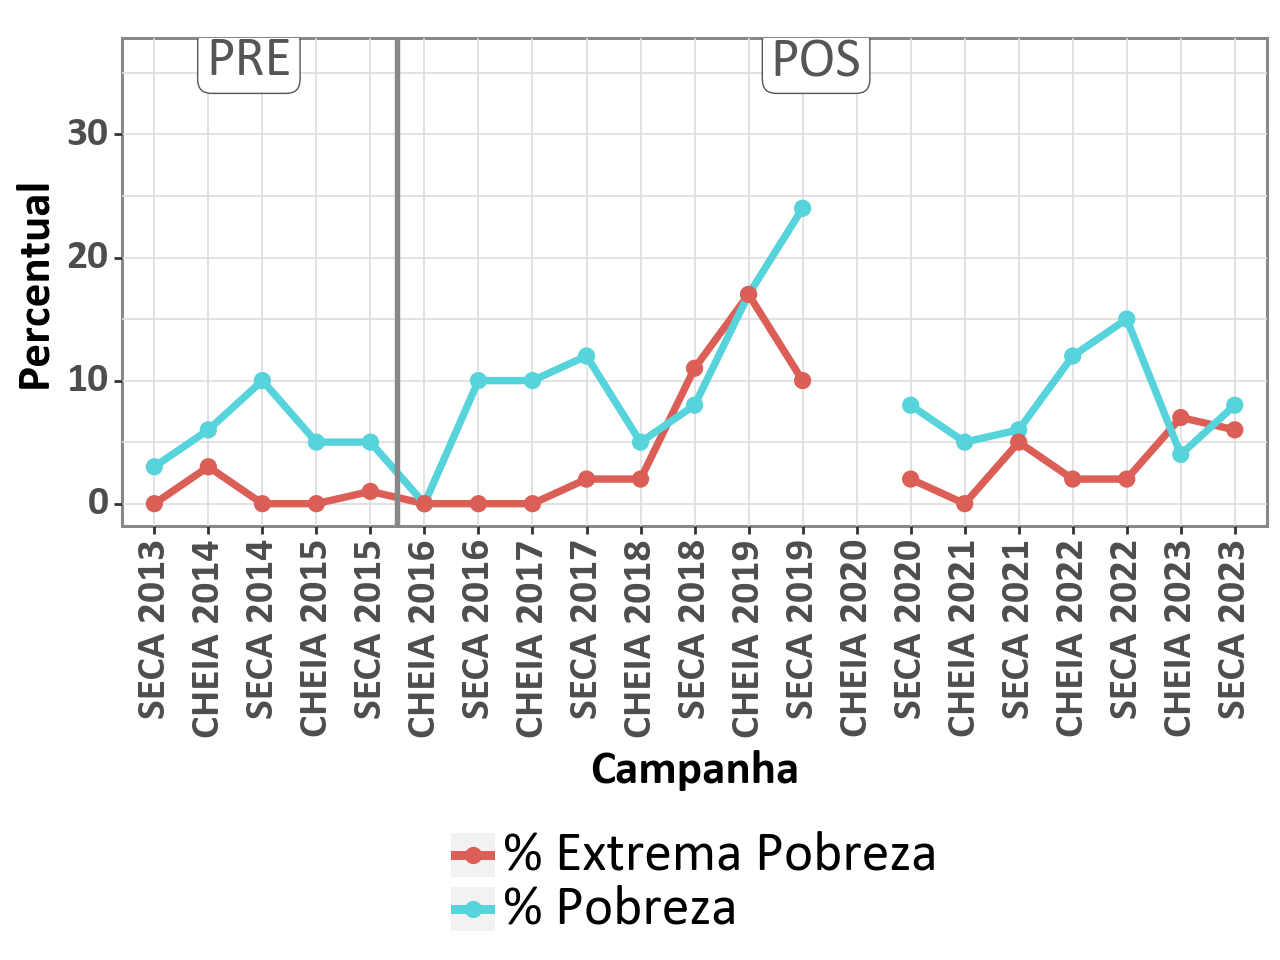

<Figure Size: (640 x 480)>

In [ ]:
graf_tx_pobreza = grafico_1_variavel(tab = tab_linha_pobreza, var_y = 'faixas_pobreza')
graf_tx_pobreza

In [ ]:
#graf_tx_pobreza.save(filename=f'21.graf_pobreza_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                path=path_graf)

### Estatística - Evolução Taxas de Pobreza

In [ ]:
for faixa in tab_linha_pobreza['faixas_pobreza'].unique():
    teste_mann_kendall = mk.original_test(
    tab_linha_pobreza.sort_values(by='periodo_padronizado2').loc[tab_linha_pobreza['faixas_pobreza'] == faixa, 'value'])
    print(f'{faixa}\n'
          f't = {teste_mann_kendall.Tau}\n'
          f'p-valor = {teste_mann_kendall.p.round(2)} \n'
          f'Tendency: {teste_mann_kendall.trend}\n')

% Pobreza
t = 0.2
p-valor = 0.23 
Tendency: no trend

% Extrema Pobreza
t = 0.3631578947368421
p-valor = 0.02 
Tendency: increasing



In [ ]:
tab_linha_pobreza.query('periodo_padronizado2 == "SECA 2022"')

,periodo_padronizado2,faixas_pobreza,value
17,SECA 2022,% Pobreza,15.0
37,SECA 2022,% Extrema Pobreza,2.0


In [ ]:
tab_linha_pobreza.sort_values(by='periodo_padronizado2', inplace=True)

In [ ]:
tab_linha_pobreza.to_excel(path_graf + fr'\tab_linha_pobreza_{localidade}.xlsx')

# Pesca

In [ ]:
df_pesc = pd.read_excel('base.xlsx', sheet_name = 'TABELA ATIVIDADE PESQUEIRA', header = 1)
df_pesc.columns = df_pesc.columns.str.lower().str.strip().str.replace(' ', '_')

In [ ]:
len(df_pesc)

9476

In [ ]:
df_pesc = df_pesc.merge(df_geral_local[colunas_df_geral], how='left', on='identificador')
len(df_pesc)

9476

In [ ]:
#df_pesc['valor_venda'] = pd.to_numeric(df_pesc['valor_venda'].str.replace(
#    '.', '').str.replace('R','').str.replace('$', '').str.replace(',','.'), errors='coerce')
df_pesc['valor_venda'] = pd.to_numeric(df_pesc['valor_venda'], errors='coerce')
df_pesc['media_dia_pescado'] = pd.to_numeric(df_pesc['media_dia_pescado'], errors='coerce')
df_pesc['quantidade_vendida'] = pd.to_numeric(df_pesc['quantidade_vendida'], errors='coerce')

In [ ]:
df_pesc.head(2)

,identificador,especie_pescada,finalidade_da_pesca,local_1,local_2,local_3,local_4,forma,barco,media_dia_pescado,unidade_pescada,quantidade_vendida,unidade_vendida,valor_venda,local_comercializacao_1,local_comercializacao_2,local_comercializacao_3,municipio_comercializacao,pesca_comercializada,via_escoamento,nome_via_escoamento_1,nome_via_escoamento_2,transporte_1,transporte_2,tempo_gasto,principal_municipio,frequencia_comercializado,valor_transporte,data,pre_/_pos,mes_ano,ano,periodo_padronizado,periodo_padronizado2,local_da_pesquisa,local_da_residencia,area
0,1,TUCUNARE,NaN,RIO XINGU,NaN,NaN,NaN,ANZOL,PROPRIO,80.0,KG,75.0,KG,400.0,ATRAVESSADOR,NaN,NaN,ALTAMIRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CURIMATA,NaN,RIO XINGU,NaN,NaN,NaN,ANZOL,PROPRIO,10.0,KG,8.0,KG,50.0,ATRAVESSADOR,NaN,NaN,ALTAMIRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# PROBLEMA --> SECA 2022 veio 'QUILOS' ao invés de 'KG'
df_pesc.query('unidade_pescada == "QUILOS"')['periodo_padronizado2'].value_counts()

periodo_padronizado2
SECA 2022    30
Name: count, dtype: int64

In [ ]:
df_pesc['unidade_pescada'] = df_pesc['unidade_pescada'].replace('QUILOS', 'KG')

### Informação Complementar (introdução)

In [ ]:
# qtdd entrevistados disseram pescar/qual peixe/qual rio/unid. medida
(df_geral_local['pratica_pesca'].value_counts(normalize=True),df_pesc['especie_pescada'].value_counts(normalize=True).head(5) ,
 df_pesc['local_1'].value_counts(normalize=True).head(5), df_pesc['unidade_pescada'].value_counts(normalize=True).head(5))

(pratica_pesca
 NAO    0.557547
 SIM    0.442453
 Name: proportion, dtype: float64,
 especie_pescada
 TUCUNARE    0.173596
 PACU        0.160089
 PESCADA     0.104369
 PIAU        0.103314
 CURIMATA    0.082946
 Name: proportion, dtype: float64,
 local_1
 RIO XINGU        0.697868
 IGARAPES         0.040734
 OUTRA            0.034192
 NAO SE APLICA    0.019734
 KAITUKA          0.019734
 Name: proportion, dtype: float64,
 unidade_pescada
 KG                     0.762769
 UNIDADE                0.206311
 NAO SE APLICA          0.017835
 NAO SABE               0.006121
 NAO SABE/NAO LEMBRA    0.003377
 Name: proportion, dtype: float64)

### Qtdd média pescada e vendida por peixe

#### Com desvio Padrão

In [ ]:
tab_pesc = df_pesc[(df_pesc['unidade_pescada']=='KG') &
                             (df_pesc['media_dia_pescado']!=0)].pivot_table(
                    index='especie_pescada',
                    values = ['media_dia_pescado', 'quantidade_vendida'],
                    columns='pre_/_pos',
                    aggfunc= {'media_dia_pescado': ['mean', np.std],
                             'quantidade_vendida':['mean', np.std]
                             }).round(2)
if 'RURAL' in localidade: # para a tabela ficar mais enxuta
    kg = 3
else:
    kg = 3
tab_pesc = tab_pesc[(tab_pesc['media_dia_pescado']['mean']['POS']>kg) &
                    (tab_pesc['media_dia_pescado']['mean']['PRE']>kg)]
# reorganizando a tabela
tab_pesc[[('media_dia_pescado', 'mean', 'PRE'), ('media_dia_pescado', 'mean', 'POS'),
          ('media_dia_pescado', 'std', 'PRE'), ('media_dia_pescado', 'std', 'POS'),
         ('quantidade_vendida', 'mean', 'PRE'), ('quantidade_vendida', 'mean', 'POS'),
          ('quantidade_vendida', 'std', 'PRE'), ('quantidade_vendida', 'std', 'POS'),]]

C:\Users\Lord-\AppData\Local\Temp\ipykernel_13528\2637131389.py:1: FutureWarning: The provided callable <function std at 0x000001CE3A814A60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


media_dia_pescado                      quantidade_vendida  \
                             mean           std                      mean   
pre_/_pos                     PRE    POS    PRE    POS                PRE   
especie_pescada                                                             
BRANQUINHA                   4.25   3.98   5.54   4.30               2.14   
CACHORRA                     4.04   4.25   2.99   1.67               1.62   
CURIMATA                     9.05   4.31  10.57   3.61               7.19   
DOURADA                     10.00   6.00   5.53   0.00               8.38   
FIDALGO                      3.40   3.50   3.29   2.12               2.20   
FILHOTE                     14.66  10.14  12.62   9.99              13.84   
MOCINHA                      3.70   5.39   2.33   8.30               0.00   
PACU                         6.41   3.78  11.36   5.57               3.93   
PESCADA                      8.27   4.59  10.26   4.63               4.73   
PIAU                         6.46   4.38   8.10   7.12               4.52   
PIRARARA                     4.72   7.60   2.95   4.88               3.22   
SURUBIM                      6.48   4.76   7.49   6.20               5.22   
TRAIRA                       3.50   3.50   3.24   3.51               2.21   
TUCUNARE                     6.29   7.37   7.25  11.03               4.41   

                                      
                          std         
pre_/_pos          POS    PRE    POS  
especie_pescada                       
BRANQUINHA        0.81   4.26   2.56  
CACHORRA          2.50   2.77   3.54  
CURIMATA          1.60   9.50   2.30  
DOURADA           3.00   4.53   4.24  
FIDALGO           3.50   3.83   2.12  
FILHOTE           7.00  11.95   3.90  
MOCINHA           0.43   0.00   1.13  
PACU              2.28   8.15   5.79  
PESCADA           2.14   8.64   4.08  
PIAU              3.63   8.07   9.11  
PIRARARA          9.00   4.06   8.49  
SURUBIM           6.82   7.84   9.03  
TRAIRA            2.50   3.28   3.54  
TUCUNARE         10.13   7.30  15.06

##### Testes Mann-Kendall quantidade pescada

In [ ]:
tab_pesc = df_pesc[(df_pesc['unidade_pescada']=='KG') &
        (df_pesc['media_dia_pescado']!=0)].pivot_table(
                index=['periodo_padronizado2', 'especie_pescada'],
                values=['media_dia_pescado', 'quantidade_vendida'],
                aggfunc='sum').round()
tab_pesc.reset_index(inplace=True)
#tab_pesc.loc[(len(tab_pesc))] = ['CHEIA 2020', np.nan, np.nan, np.nan]
tab_pesc['periodo_padronizado2'] = pd.Categorical(
                    tab_pesc['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories, ordered=True)

In [ ]:
dic_peixes = {}
for peixe in tab_pesc['especie_pescada'].unique():
    # peixes com menos de 3 obs no tempo não vale para teste estatístico de tendencia
    if len(tab_pesc.loc[tab_pesc['especie_pescada'] == peixe])>5:
        serie_peixe = tab_pesc.loc[tab_pesc['especie_pescada'] == peixe].sort_values(
            by='periodo_padronizado2')['media_dia_pescado']
        result = mk.original_test(serie_peixe).trend
        p = round(mk.original_test(serie_peixe).p, 2)
        t = round(mk.original_test(serie_peixe).Tau, 2)
        dic_peixes[peixe.capitalize()] = result, t, p

In [ ]:
texto = (f'Considerando-se, a sazonalidade, ou seja, os períodos de cheia e seca,'
         f' as seguintes espécies apresentaram tendência ao longo dos monitoramentos: ')
for k, v in dic_peixes.items():
    if v[2] <0.05:
        texto += f'{k} (t = {v[1]}; p = {v[2]}), '
texto = texto.replace('.',',')
texto

'Considerando-se, a sazonalidade, ou seja, os períodos de cheia e seca, as seguintes espécies apresentaram tendência ao longo dos monitoramentos: Curimata (t = -0,45; p = 0,01), Filhote (t = -0,61; p = 0,01), Mapara (t = -0,62; p = 0,02), Pescada (t = -0,44; p = 0,01), Piranha (t = -0,57; p = 0,0), '

## Plot - Evolução do qtdd média de pesca por ano

### Gráfico - Quantidade Média Pescada

In [ ]:
tab_pesc = df_pesc[(df_pesc['unidade_pescada']=='KG') & (df_pesc['media_dia_pescado']!=0)].pivot_table(
                   index=['periodo_padronizado2', 'periodo_padronizado'],
                   values = ['media_dia_pescado'],
                   aggfunc= {'media_dia_pescado': ['mean', np.std] }).round(2)
tab_pesc.reset_index(inplace=True)
tab_pesc.loc[(len(tab_pesc))] = ['CHEIA 2020','CHEIA', np.nan, np.nan]
tab_pesc.columns = tab_pesc.columns.droplevel(1)
tab_pesc.columns = ['periodo_padronizado2', 'periodo_padronizado', 'media', 'std']
tab_pesc['label_media'] = 'Média de pescado por dia'
tab_pesc['periodo_padronizado2'] = pd.Categorical(
                    tab_pesc['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
tab_pesc.sort_values(by='periodo_padronizado2', inplace=True)
tab_pesc.head(2)

C:\Users\Lord-\AppData\Local\Temp\ipykernel_13528\4131000725.py:1: FutureWarning: The provided callable <function std at 0x000001CE3A814A60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


,periodo_padronizado2,periodo_padronizado,media,std,label_media
10,SECA 2012,SECA,14.68,14.36,Média de pescado por dia
0,CHEIA 2013,CHEIA,6.51,6.91,Média de pescado por dia


In [ ]:
tab_pesc.to_excel(path_graf + fr'\tab_pesc_{localidade}.xlsx')

C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 20 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 20 rows containing missing values.


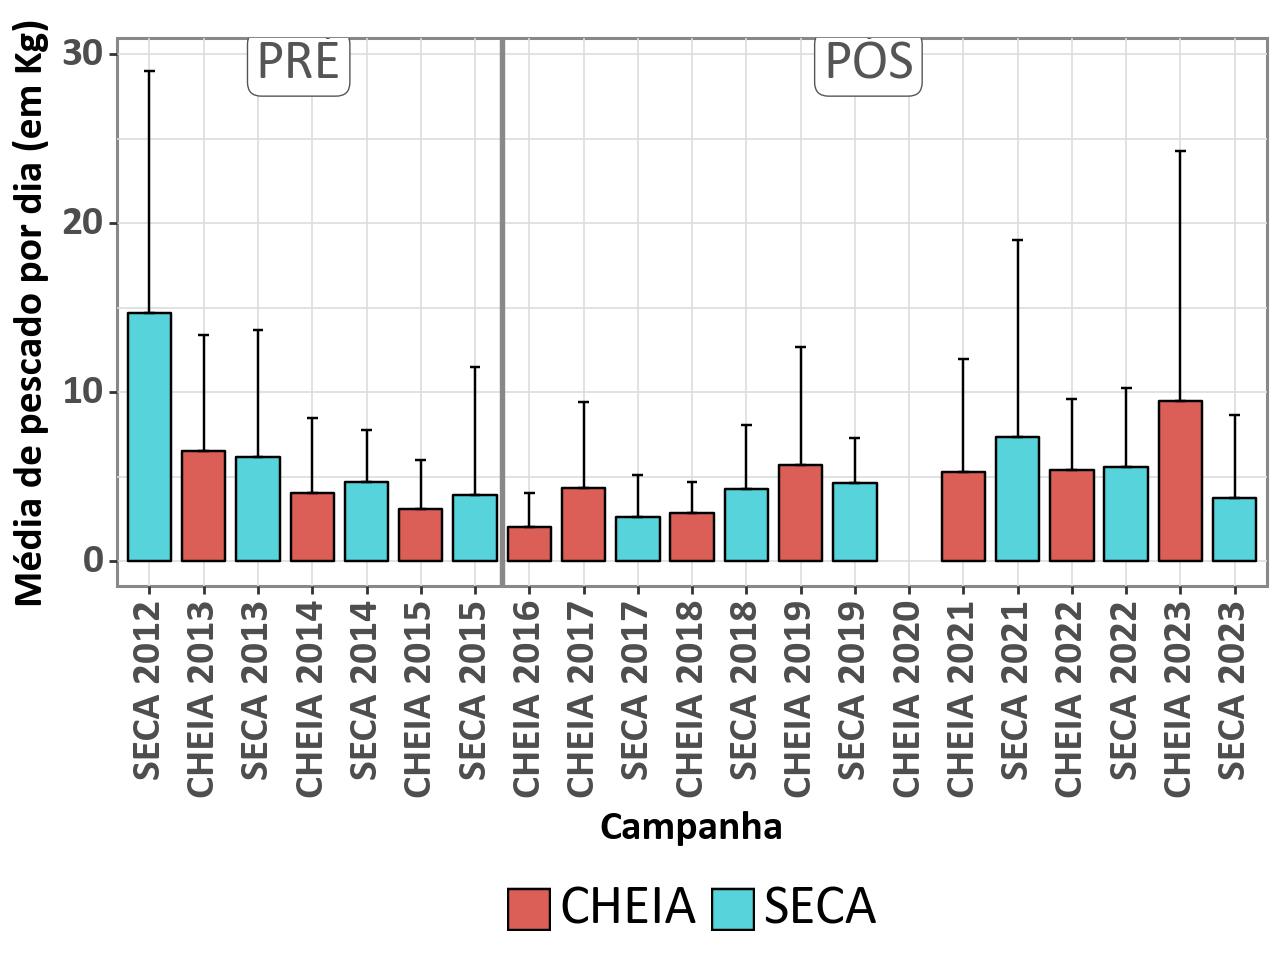

<Figure Size: (640 x 480)>

In [ ]:
graf_pesca = grafico_barra(tab = tab_pesc,
                              y_value = 'media',
                              y_std = 'std',
                              fill_color = 'periodo_padronizado',
                              label_x = 'Média de pescado por dia (em Kg)')
graf_pesca

In [ ]:
#graf_pesca.save(filename=f'17.graf_qtdd_media_pescada_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                path=path_graf)

### Estatística - média pescado

In [ ]:
teste_mann_kendall = mk.original_test(tab_pesc.sort_values(by='periodo_padronizado2')['media'])
print(f't = {teste_mann_kendall.Tau} \n'
      f'p-valor = {teste_mann_kendall.p.round(2)} \n'
      f'Tendency: {teste_mann_kendall.trend} \n')

t = 0.05263157894736842 
p-valor = 0.77 
Tendency: no trend 



## Plot. Quantidade Média Comercializada de Pescado

In [ ]:
tab_pesc = df_pesc[(df_pesc['unidade_pescada']=='KG') & (df_pesc['media_dia_pescado']!=0)].pivot_table(
                   index=['periodo_padronizado2', 'periodo_padronizado'],
                   values = ['quantidade_vendida'],
                   aggfunc= {'quantidade_vendida': ['mean', np.std] }).round(2)
tab_pesc.reset_index(inplace=True)
tab_pesc.loc[(len(tab_pesc))] = ['CHEIA 2020', 'CHEIA', np.nan, np.nan]
tab_pesc.columns = tab_pesc.columns.droplevel(1)
tab_pesc.columns = ['periodo_padronizado2', 'periodo_padronizado', 'media', 'std']
tab_pesc['label_media'] = 'Quantidade média vendida por dia'
tab_pesc['periodo_padronizado2'] = pd.Categorical(
                    tab_pesc['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
tab_pesc.head(2)

C:\Users\Lord-\AppData\Local\Temp\ipykernel_13528\1070877846.py:1: FutureWarning: The provided callable <function std at 0x000001CE3A814A60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


,periodo_padronizado2,periodo_padronizado,media,std,label_media
0,CHEIA 2013,CHEIA,4.24,7.17,Quantidade média vendida por dia
1,CHEIA 2014,CHEIA,2.99,4.83,Quantidade média vendida por dia


In [ ]:
tab_pesc.sort_values(by='periodo_padronizado2', inplace=True)
tab_pesc.to_excel(path_graf + fr'\tab_pesc_comerc_{localidade}.xlsx')

C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 19 rows containing missing values.
C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_label : Removed 19 rows containing missing values.


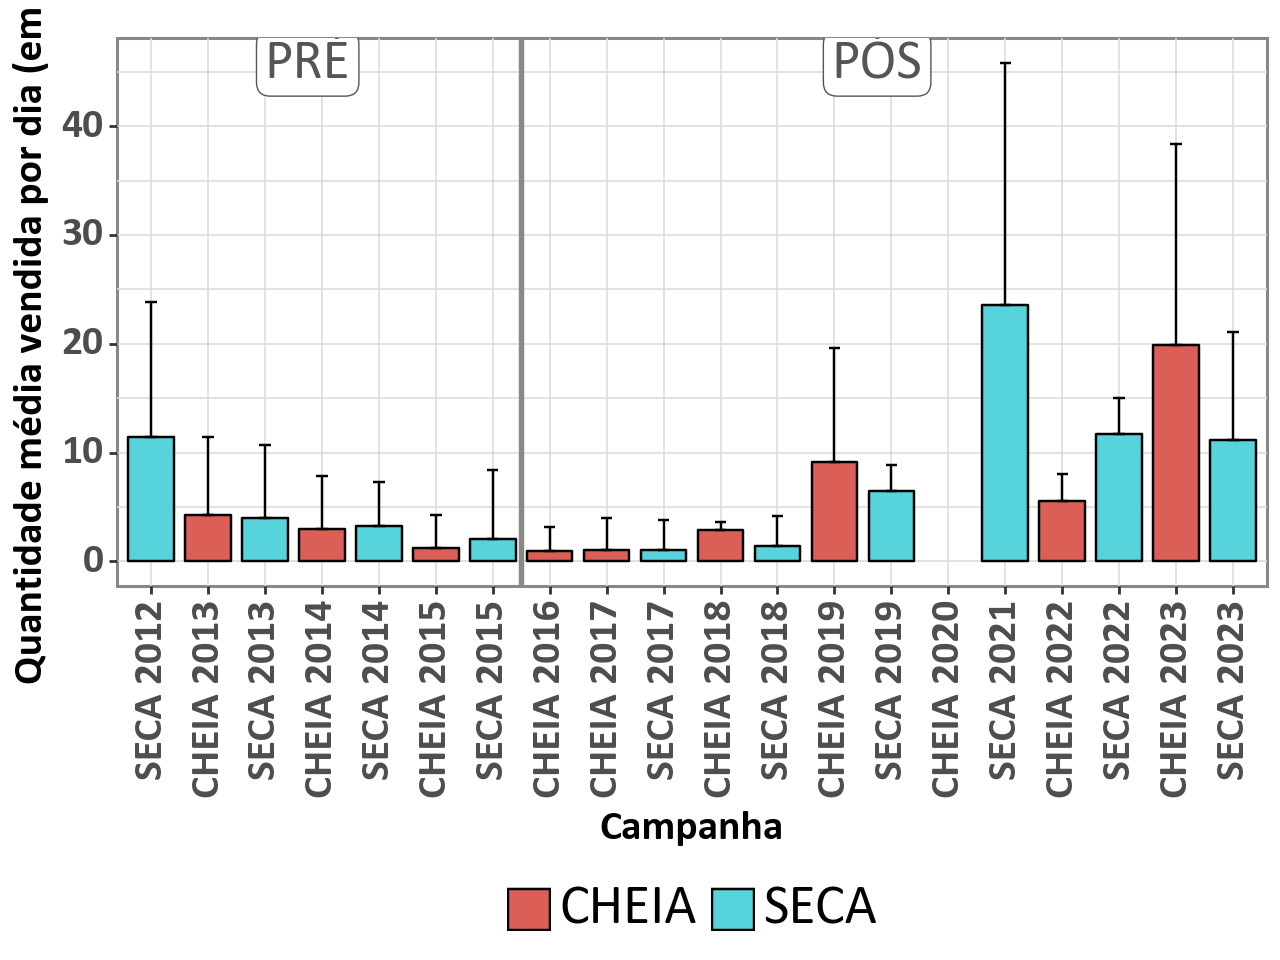

<Figure Size: (640 x 480)>

In [ ]:
graf_pesca_comercializada = grafico_barra(tab = tab_pesc,
                                          y_value = 'media',
                                          y_std = 'std',
                                          fill_color = 'periodo_padronizado',
                                          label_x = 'Quantidade média vendida por dia (em Kg)')
graf_pesca_comercializada

In [ ]:
#graf_pesca_comercializada.save(filename=f'18.graf_qtdd_media_comercializad_pescado_{localidade}.png', width = 30, height = 18,units='cm', dpi = 400, limitsize=True,
#                path = path_graf)

### Estatística Média Comercializado

In [ ]:
teste_mann_kendall = mk.original_test(tab_pesc.sort_values(by='periodo_padronizado2')['media'])
print(f't = {teste_mann_kendall.slope} \n'
      f'p-valor = {teste_mann_kendall.p.round(2)} \n'
      f'Tendency: {teste_mann_kendall.trend} \n')

t = 0.35 
p-valor = 0.16 
Tendency: no trend 



# Análise da Renda em todo o TVR

### Renda Familiar

In [ ]:
# agrupando a renda por família --> soma do que cada um recebe
tab_rend_fam = df_grupo_fam.pivot_table(index='identificador',
                         values=['remuneracao_mensal_real', 'nome_dos_membros_do_grupo_familiar'],
                         aggfunc={'remuneracao_mensal_real': 'sum',}).round(4)
# colocar None para não atrapalhar cálculo de média se for fazer depois
tab_rend_fam.loc[tab_rend_fam['remuneracao_mensal_real']==0, 'remuneracao_mensal_real'] = None
# join com outras info e pivot tab
tab_rend_fam = tab_rend_fam.merge(
                   df_geral[['identificador', 'ano', 'periodo_padronizado', 'periodo_padronizado2']],
                   on='identificador', how='inner')
tab_rend_fam = tab_rend_fam.pivot_table(index=['ano'],
                        values=['remuneracao_mensal_real'],
                        aggfunc=['mean', 'std']).round(2)
tab_rend_fam.reset_index(inplace=True)
tab_rend_fam.columns = tab_rend_fam.columns.droplevel(1)

In [ ]:
tab_rend_fam

,ano,mean,std
0,2013,3497.86,2478.10
1,2014,2766.99,1975.57
2,2015,2531.37,1752.88
3,2016,2317.57,1524.61
4,2017,2201.88,1712.67
5,2018,2050.76,1635.82
6,2019,1544.04,1350.11
7,2020,2123.49,1462.50
8,2021,2355.83,2230.45
9,2022,2453.25,2332.35


### Renda Per Capita

In [ ]:
# agrupando a renda por família --> soma do que cada um recebe
tab_rend_fam = df_grupo_fam.pivot_table(index='identificador',
                         values=['remuneracao_mensal_real', 'nome_dos_membros_do_grupo_familiar'],
                         aggfunc={'remuneracao_mensal_real': 'sum',
                                  'nome_dos_membros_do_grupo_familiar':'count' # nº de membros
                                  }).round(4)
tab_rend_fam.rename(columns={'nome_dos_membros_do_grupo_familiar': 'n_moradores'}, inplace=True)
# colocar None para não atrapalhar cálculo de média se for fazer depois
tab_rend_fam.loc[tab_rend_fam['remuneracao_mensal_real']==0, 'remuneracao_mensal_real'] = None
# join com outras info e pivot tab
tab_rend_fam = tab_rend_fam.merge(
                   df_geral[['identificador', 'ano', 'periodo_padronizado', 'periodo_padronizado2']],
                   on='identificador', how='inner')
tab_rend_fam['remuneracao_mensal_real_per_capita'] = (
    tab_rend_fam['remuneracao_mensal_real']/tab_rend_fam['n_moradores']).round(2)
tab_rend_fam = tab_rend_fam.pivot_table(index=['ano'],
                        values=['remuneracao_mensal_real_per_capita'],
                        aggfunc=['mean', 'std']).round(2)
tab_rend_fam.reset_index(inplace=True)
tab_rend_fam.columns = tab_rend_fam.columns.droplevel(1)

In [ ]:
tab_rend_fam

,ano,mean,std
0,2013,1051.91,838.32
1,2014,883.38,662.62
2,2015,916.44,688.60
3,2016,823.69,647.34
4,2017,678.16,608.95
5,2018,699.93,704.88
6,2019,420.95,335.76
7,2020,702.39,497.07
8,2021,828.01,1090.37
9,2022,806.37,719.90


# Pobreza ISSA

In [ ]:
array_columns = df_geral.columns.values

In [ ]:
# colunas com nome de renda
[column for column in array_columns if 'benefi' in column]

['produtos_beneficiados_no_estabelecimento_safra_ano',
 'produtos_beneficiados_no_estabelecimento_sim_ou_nao',
 'favor_continuar_o_preenchimento_do_item_na_tabela_produtos_beneficiados',
 'soma_beneficios',
 'beneficiamento_de_produtos_agricolas']

In [ ]:
# remuneracao por familia
# não é necessário deflacionar, pois a taxa de pobreza é calculada em cima da renda nominal
tab_rend_fam = df_grupo_fam.pivot_table(
            index='identificador',
            values=['remuneracao_mensal','nome_dos_membros_do_grupo_familiar'],
            aggfunc={'remuneracao_mensal': 'sum', # soma da remuneração da família
            'nome_dos_membros_do_grupo_familiar':'count'}) # número de membros --> p/ fazer pcapita
# calculo percapita
tab_rend_fam['renda_p_capita'] = (tab_rend_fam['remuneracao_mensal']/
                                  tab_rend_fam['nome_dos_membros_do_grupo_familiar']).round(2)
tab_rend_fam = tab_rend_fam[tab_rend_fam['renda_p_capita']!=0] # elimna algumas dezenas de obs
# informaçoes gerais
tab_rend_fam = tab_rend_fam.merge(
            df_geral[['identificador', 'ano', 'periodo_padronizado',
                            'periodo_padronizado2', 'ano_mes']],
            how='left', on='identificador')

In [ ]:
tab_rend_fam

,identificador,nome_dos_membros_do_grupo_familiar,remuneracao_mensal,renda_p_capita,ano,periodo_padronizado,periodo_padronizado2,ano_mes
0,371,4,1400.0,350.00,2013,SECA,SECA 2013,201308.0
1,372,2,900.0,450.00,2013,SECA,SECA 2013,201308.0
2,373,6,3200.0,533.33,2013,SECA,SECA 2013,201308.0
3,374,3,500.0,166.67,2013,SECA,SECA 2013,201308.0
4,375,4,4200.0,1050.00,2013,SECA,SECA 2013,201308.0
...,...,...,...,...,...,...,...,...
3982,194236739,1,299.0,299.00,2023,SECA,SECA 2023,202311.0
3983,194236740,3,799.0,266.33,2023,SECA,SECA 2023,202311.0
3984,194239688,4,1600.0,400.00,2023,SECA,SECA 2023,202311.0
3985,194239689,2,1999.0,999.50,2023,SECA,SECA 2023,202311.0


Abaixo será feito o cálculo de quais famílias estão sob as linhas de pobreza e extrema pobreza

In [ ]:
# construindo uma coluna que indica quais famílias estão sob a linha da pobreza
tab_rend_fam['l_pobreza'] = None
for i in tab_rend_fam.index:
    if tab_rend_fam['ano_mes'][i] < 201406:
        if (tab_rend_fam['renda_p_capita'][i] <= 140) & (tab_rend_fam['renda_p_capita'][i] > 70):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201406) &  (tab_rend_fam['ano_mes'][i] < 201607):
        if (tab_rend_fam['renda_p_capita'][i] <= 154) & (tab_rend_fam['renda_p_capita'][i] > 77):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201607) &  (tab_rend_fam['ano_mes'][i] < 201807):
        if (tab_rend_fam['renda_p_capita'][i] <= 170) & (tab_rend_fam['renda_p_capita'][i] > 85):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201807) &  (tab_rend_fam['ano_mes'][i] < 202111):
        if (tab_rend_fam['renda_p_capita'][i] <= 178) & (tab_rend_fam['renda_p_capita'][i] > 89):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 202111) &  (tab_rend_fam['ano_mes'][i] < 202203):
        if (tab_rend_fam['renda_p_capita'][i] <= 200) & (tab_rend_fam['renda_p_capita'][i] > 100):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 202203) &  (tab_rend_fam['ano_mes'][i] < 202306):
        if (tab_rend_fam['renda_p_capita'][i] <= 210) & (tab_rend_fam['renda_p_capita'][i] > 105):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'
    else:
        if (tab_rend_fam['renda_p_capita'][i] <= 218) & (tab_rend_fam['renda_p_capita'][i] > 105):
            tab_rend_fam.loc[i, 'l_pobreza'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza'] = 'nao'

In [ ]:
# construindo uma coluna que indica quais famílias estão sob a linha da pobreza EXTREMA
tab_rend_fam['l_pobreza_ext'] = None
for i in tab_rend_fam.index:
    if tab_rend_fam['ano_mes'][i] < 201406:
        if (tab_rend_fam['renda_p_capita'][i] <= 70):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201406) &  (tab_rend_fam['ano_mes'][i] < 201607):
        if (tab_rend_fam['renda_p_capita'][i] <= 77):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201607) &  (tab_rend_fam['ano_mes'][i] < 201807):
        if (tab_rend_fam['renda_p_capita'][i] <= 85):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 201807) &  (tab_rend_fam['ano_mes'][i] < 202111):
        if (tab_rend_fam['renda_p_capita'][i] <= 89):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    elif (tab_rend_fam['ano_mes'][i] >= 202111) &  (tab_rend_fam['ano_mes'][i] < 202203):
        if (tab_rend_fam['renda_p_capita'][i] <= 100):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'
    else:
        if (tab_rend_fam['renda_p_capita'][i] <= 105):
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'sim'
        else:
            tab_rend_fam.loc[i, 'l_pobreza_ext'] = 'nao'

In [ ]:
tab_rend_fam['l_pobreza'] = tab_rend_fam['l_pobreza'].apply(lambda row: 0 if row == 'nao' else 1)
tab_rend_fam['l_pobreza_ext'] = tab_rend_fam['l_pobreza_ext'].apply(lambda row: 0 if row == 'nao' else 1)

In [ ]:
tab_rend_fam['l_pobreza'].value_counts()

l_pobreza
0    3573
1     414
Name: count, dtype: int64

In [ ]:
tab_rend_fam.head(1)

,identificador,nome_dos_membros_do_grupo_familiar,remuneracao_mensal,renda_p_capita,ano,periodo_padronizado,periodo_padronizado2,ano_mes,l_pobreza,l_pobreza_ext
0,371,4,1400.0,350.0,2013,SECA,SECA 2013,201308.0,0,0


In [ ]:
tab_rend_fam2 = tab_rend_fam.merge(df_geral[['identificador',
                                             'monitoramento',
                                             'proprietario',
                                             'pre_/_pos',
                                             'data',
                                             'area',
                                             'renda_mensal_liq_agrop',
                                             'renda_mensal_liq_pesca',
                                             'renda_mensal_liq_extrat_veg',
                                             'renda_mensal_liq_extrat_min',
                                             'soma_beneficios']],
                                    how = 'left',
                                    on = 'identificador')

In [ ]:
#tab_rend_fam2.to_csv('tab_rend_fam2.csv', index=False)

In [ ]:
#tab_rend_fam.to_csv('tab_rend_fam_pobreza.csv', index = False)

 linha de pobreza

tab_linha_pobreza = tab_rend_fam.pivot_table(
                       index=['ano', 'periodo_padronizado2'],
                       values='identificador',
                       columns='l_pobreza',
                       aggfunc='count')
tab_linha_pobreza['% Pobreza'] = (tab_linha_pobreza['sim']/(tab_linha_pobreza['nao'] + tab_linha_pobreza['sim'])).round(2)       
 linha de extrema pobreza

tab_linha_pobreza_ext = tab_rend_fam.pivot_table(index=['ano', 'periodo_padronizado2'],
                       values='identificador',
                       columns='l_pobreza_ext',
                       aggfunc='count')
tab_linha_pobreza_ext['% Extrema Pobreza'] = (tab_linha_pobreza_ext['sim']/(tab_linha_pobreza_ext['nao'] + tab_linha_pobreza_ext['sim'])).round(2)       
 join pobreza e extrema pobreza

tab_linha_pobreza = tab_linha_pobreza[['% Pobreza']].join(
                tab_linha_pobreza_ext[['% Extrema Pobreza']])

tab_linha_pobreza.reset_index(inplace=True)
tab_linha_pobreza['% Pobreza'].fillna(0, inplace=True) # manter padrão visual dos RC's anteriores
tab_linha_pobreza['% Extrema Pobreza'].fillna(0, inplace=True) # idem
 Tidy format

tab_linha_pobreza = pd.melt(tab_linha_pobreza[['periodo_padronizado2', '% Pobreza',
                           '% Extrema Pobreza']], id_vars=['periodo_padronizado2'],
        var_name='faixas_pobreza')
 colocando 2020

tab_linha_pobreza.loc[len(tab_linha_pobreza)] = ['CHEIA 2020', '% Pobreza', np.nan]
tab_linha_pobreza.loc[len(tab_linha_pobreza)] = ['CHEIA 2020', '% Extrema Pobreza', np.nan]
 criando categorias

tab_linha_pobreza['periodo_padronizado2'] = pd.Categorical(
                    tab_linha_pobreza['periodo_padronizado2'],
                    categories = periodo_padronizado2_categories,
                    ordered=True)
tab_linha_pobreza['value'] = tab_linha_pobreza['value']*100
maximo = tab_linha_pobreza['value'].max()

In [ ]:
tab_linha_pobreza.head(2)

,periodo_padronizado2,faixas_pobreza,value
0,SECA 2013,% Pobreza,3.0
20,SECA 2013,% Extrema Pobreza,0.0


# 9. Garbage

In [ ]:
atividades_label = ['Garimpo',
                     'Funcionalismo Público',
                     'Comércio',
                     'Aposentado(a)/ Pensionista',
                     'Pesca',
                     'Outro',
                     'Produtor rural',
                     'Serviços',
                     'Servicos gerais/ Diarista',
                     'Autônomo',
                     'Não trabalha',
                     'Piloto de embarcação',
                     'Não Respondeu',
                     'Trabalhador Rural',
                     'Construção Civil',
                     'Barqueiro/Piloto',
                     'Operador da Bomba',
                     'Serviços Gerais ',
                     'Tec de mineração',
                     'Técnico',
                     'Técnico mineração',
                     'Operador de tratar',
                     'Agente de comunicação',
                     'Operador',
                     'Lavadeira',
                     'Faz galinheiro',
                     'Encaregado do abastecimento  de agua',
                     'Blaster',
                     'Barqueiro',
                     'Auxiluar tec de operacoes',
                     'Auxiliar  de escritorio',
                     'Auxiliar',
                     'Tec em mineiracao']

## Análise de Regressão

In [ ]:
import statsmodels.formula.api as smf # f stands for formula approach
# regiao
X =  [4498, 4481, 3536, 3254, 2756, 3005, 2551, 2394, 2554]
# TVR
Y = [3497, 2766, 2531, 2317, 2201, 2050, 1544, 2123, 2355]
reg_df = pd.DataFrame([X,Y]).transpose()
reg_df.columns = ['renda_regiao', 'renda_tvr']

In [ ]:
# Criando o modelo de regressão linear
modelo = smf.ols('renda_tvr ~ renda_regiao', data = reg_df).fit()

# Sumário do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              renda_tvr   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     16.39
Date:                Mon, 04 Mar 2024   Prob (F-statistic):            0.00488
Time:                        19:50:42   Log-Likelihood:                -63.429
No. Observations:                   9   AIC:                             130.9
Df Residuals:                       7   BIC:                             131.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      561.5060    460.321      1.220   

C:\Users\Lord-\miniconda3\envs\ds-general\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9


In [ ]:
print('sucesso')

sucesso
